## RETAIL_SALES_FORECAST_PREDICTION_P_1

### PROJECT _1: RETAIL SALES FORECASTING: 

### Introduction:

   A giant superstore has worldwide operations. It operates across the globe and deals with all the major product categories - consumer, corporate & home office. In this analysis, a forecasting model is developed using machine learning algorithms to improve the accuracy of forecasts of sales. The proposed model is especially targeted to support the future purchase and more accurate forecasts product sales and A model based on a superstore's data is developed in order to validate the use of the various machine learning algorithms. In the case study, multiple regression methods are compared best model is chosen the store caters to 7 different market segments and in 3 major categories. 
 

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Enable inline plotting for Jupyter notebooks
%matplotlib inline

In [2]:
# Suppress warnings to keep the output clean
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
# Load the retail sales dataset from a CSV file
df=pd.read_csv("C:/Users/ishik/OneDrive/Desktop/Capstone_Project/retail.csv")

In [4]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


In [5]:
df.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Postal Code', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype=object)

In [184]:
# Check for any missing values in the dataset
df.isnull().sum()

Quantity                    0
Discount                    0
Profit                      0
Shipping Cost               0
Sales                       0
Segment_Corporate           0
Segment_Home Office         0
Category_Office Supplies    0
Category_Technology         0
Sub-Category_Appliances     0
Sub-Category_Art            0
Sub-Category_Binders        0
Sub-Category_Bookcases      0
Sub-Category_Chairs         0
Sub-Category_Copiers        0
Sub-Category_Envelopes      0
Sub-Category_Fasteners      0
Sub-Category_Furnishings    0
Sub-Category_Labels         0
Sub-Category_Machines       0
Sub-Category_Paper          0
Sub-Category_Phones         0
Sub-Category_Storage        0
Sub-Category_Supplies       0
Sub-Category_Tables         0
Order Priority_High         0
Order Priority_Low          0
Order Priority_Medium       0
dtype: int64

In [6]:
# Reordering the columns, just to make it easier to focus on 'Sales' as our target variable.
column_names=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Postal Code', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority','Sales']

In [7]:
df=df[column_names]

In [8]:
df.head(2) ### Shifted 'SALES' columnn to end ,for easy analysis of  Target Variable

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",2,0.0,106.140,35.46,Medium,408.300
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",3,0.1,36.036,9.72,Medium,120.366


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

***As we observe above, there few columns like ID's which logicaly dont have impact on the Sales,so we can just drop such***

In [10]:
#dropping columns that we won't be using in our analysis.
df.drop(['Row ID','Order ID','Customer ID','Product ID','Postal Code','Ship Mode'],axis=1,inplace=True)
df.head()

,Order Date,Ship Date,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
0,1/1/2011,6/1/2011,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",2,0.0,106.140,35.46,Medium,408.300
1,1/1/2011,8/1/2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",3,0.1,36.036,9.72,Medium,120.366
2,1/1/2011,5/1/2011,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",4,0.0,29.640,8.17,High,66.120
3,1/1/2011,5/1/2011,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",3,0.5,-26.055,4.82,High,44.865
4,1/1/2011,8/1/2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",5,0.1,37.770,4.70,Medium,113.670


In [11]:
df.shape 

(51290, 18)

In [12]:
df=df.iloc[0:10000,:]

In [13]:
df.shape

(10000, 18)

In [14]:
df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

### Statement:1 Basic Exploratory Data Analysis

**Box Plot**

In [15]:
# Let's create a boxplot to visualize how sales are distributed across different states.
plt.figure(figsize=(20,8))
sns.boxplot(x="State",y="Sales",data= df)
plt.title('State wise Sales')

***Above plot occurs where there are huge amount of categorical variable,which is difficult to interpret,so in order derive senseful insights have to use main components for analysis,further if we are in need if any particular city/state analysis we can choose accoordingly***

In [16]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Region",y="Sales",data= df)
plt.title('Region wise Sales')

In [17]:
df.head(2)

,Order Date,Ship Date,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
0,1/1/2011,6/1/2011,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",2,0.0,106.140,35.46,Medium,408.300
1,1/1/2011,8/1/2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",3,0.1,36.036,9.72,Medium,120.366


<Axes: xlabel='Segment', ylabel='Sales'>

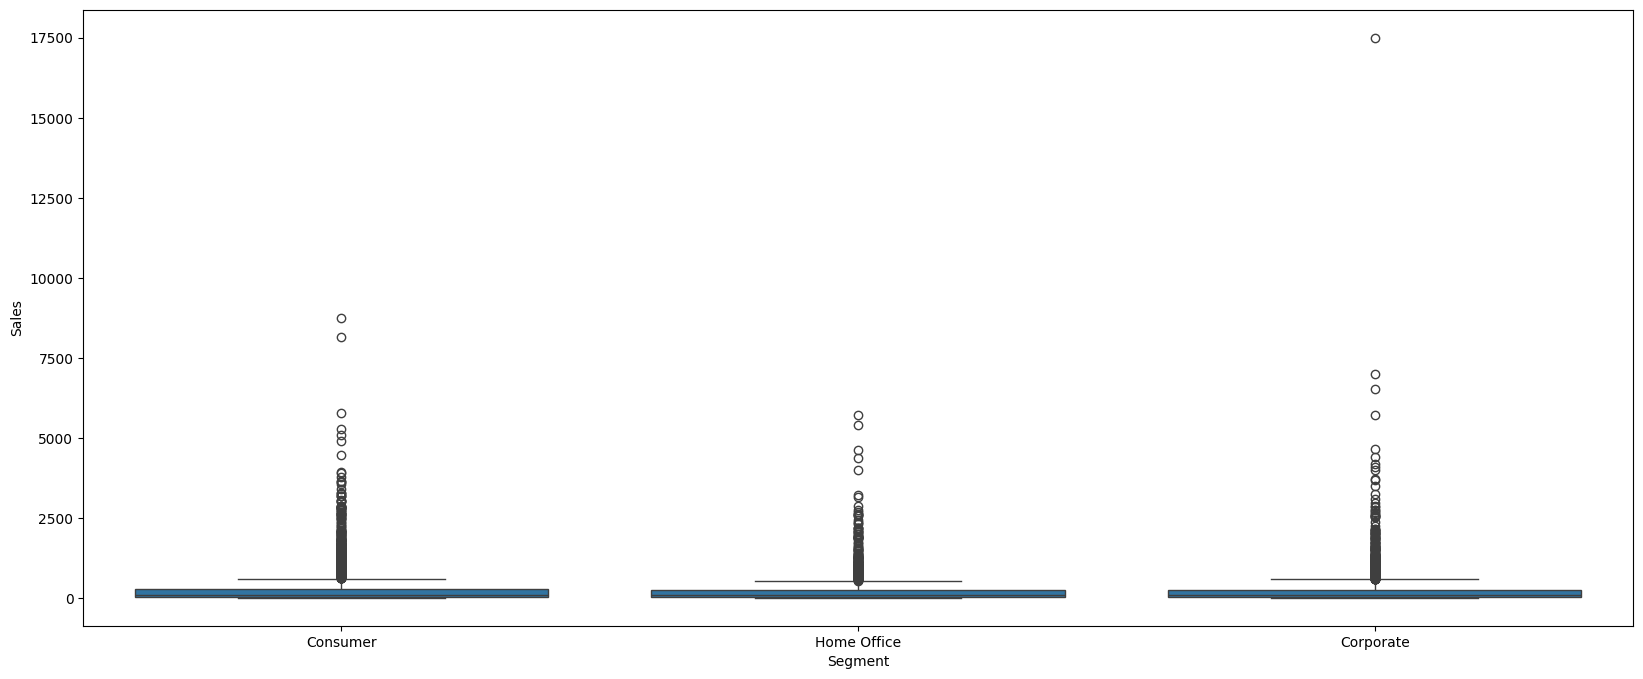

In [49]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Segment',y='Sales',data=df)

Text(0.5, 1.0, 'Relationship of Order Priority and Profits')

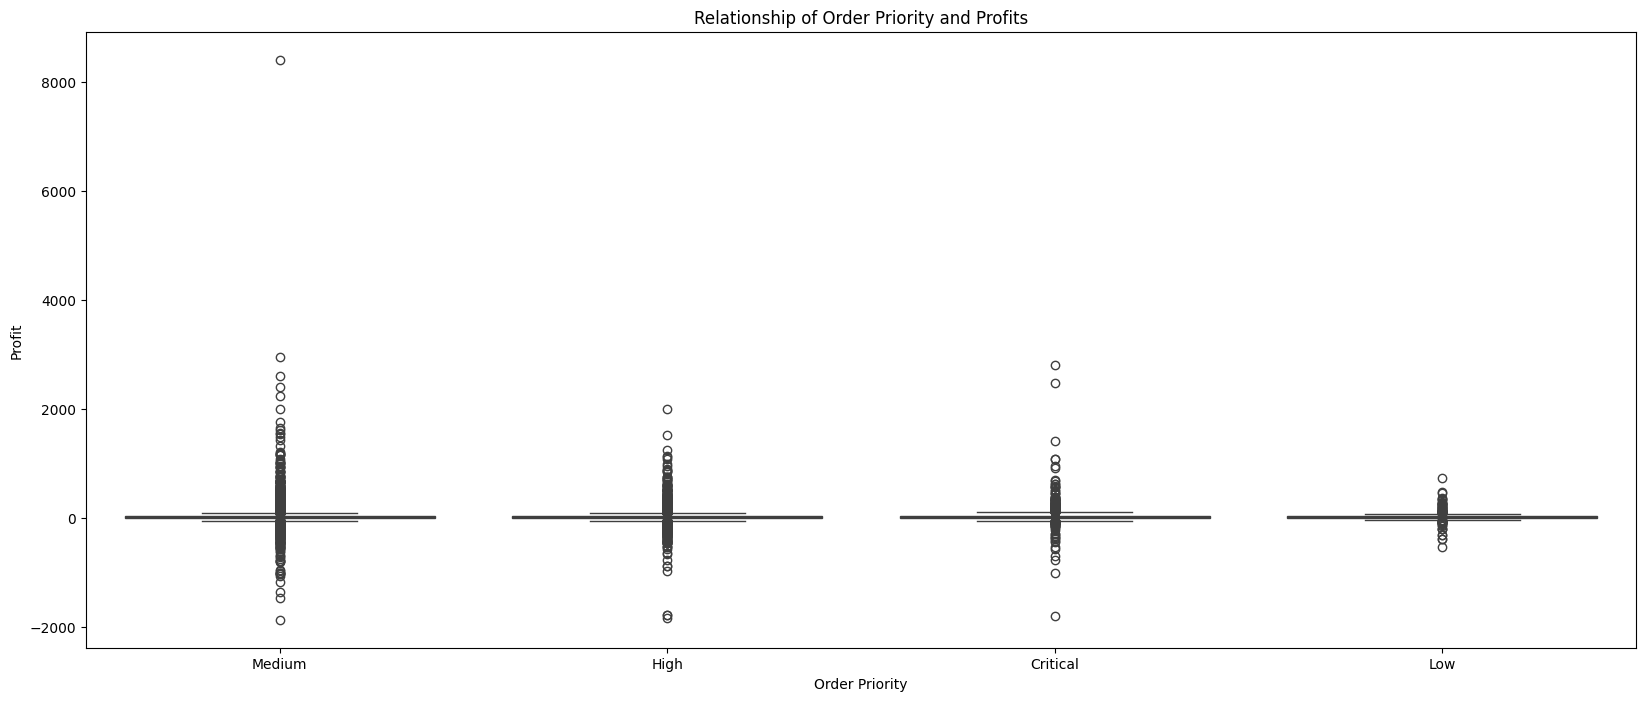

In [50]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Order Priority",y="Profit",data= df)
plt.title('Relationship of Order Priority and Profits')

Text(0.5, 1.0, 'Relationship of Order Priority and Sales')

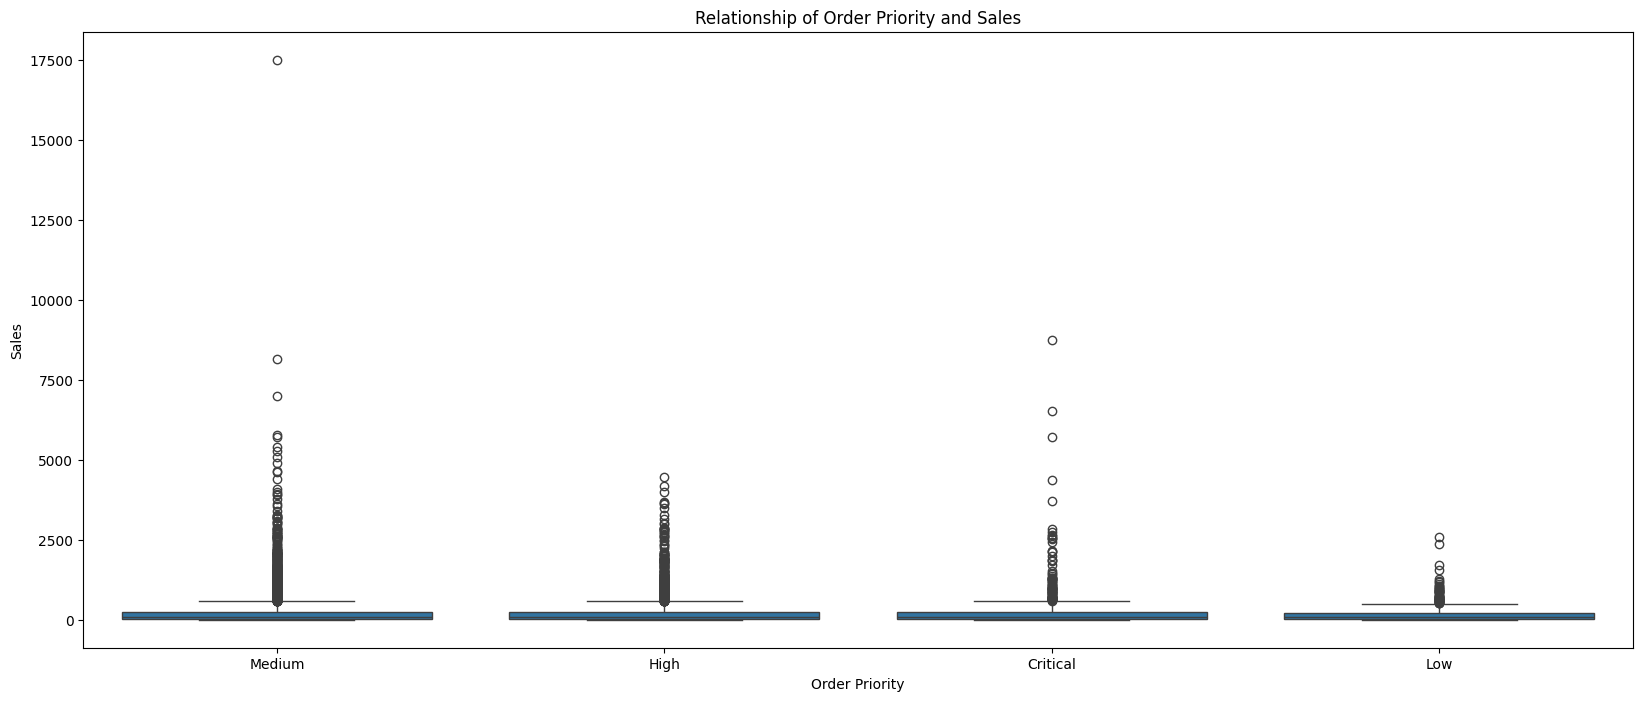

In [51]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Order Priority",y="Sales",data= df)
plt.title('Relationship of Order Priority and Sales')

Text(0.5, 1.0, 'Category Wise Sales')

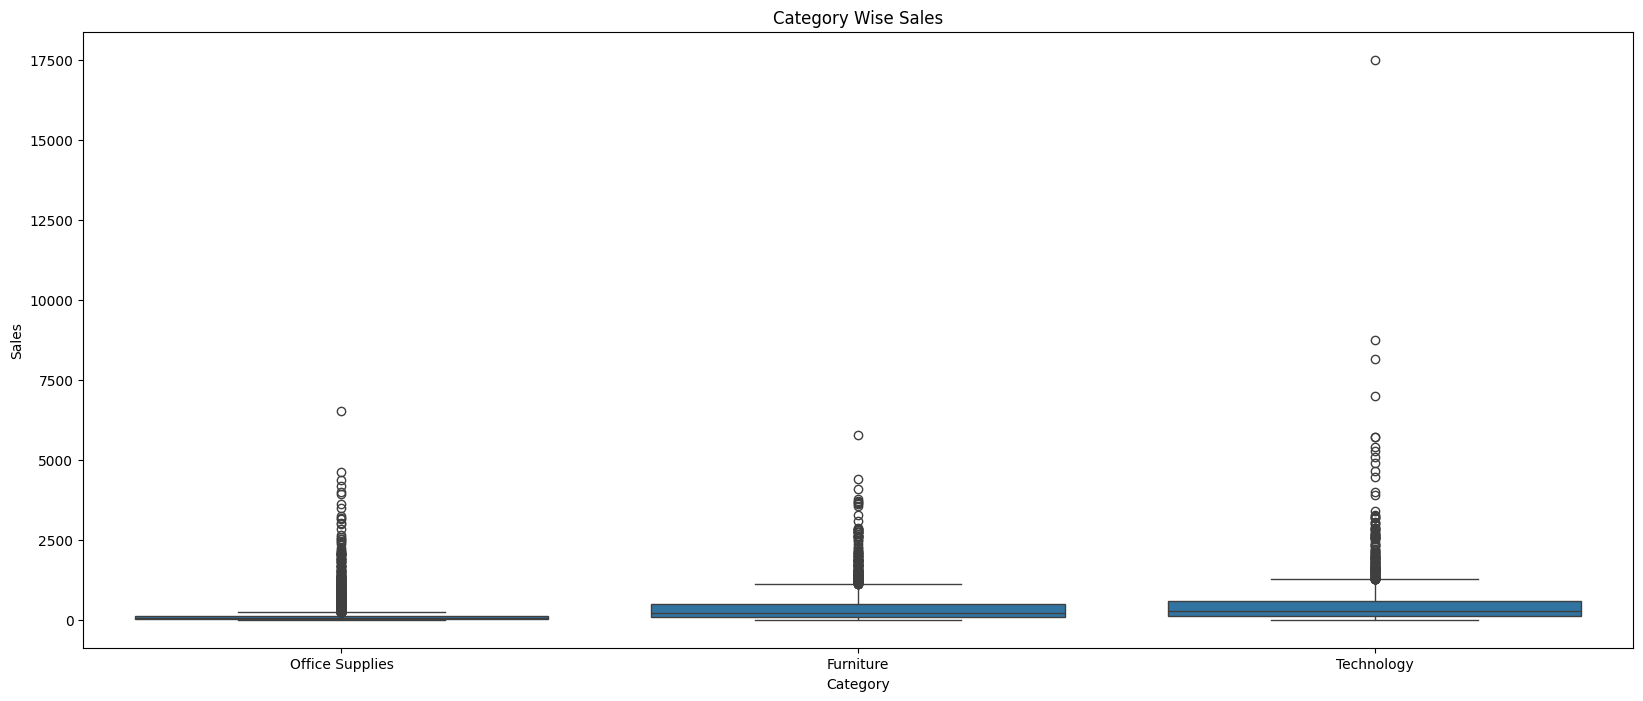

In [52]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Category",y="Sales",data= df)
plt.title('Category Wise Sales')

Text(0.5, 1.0, 'Sales of sub category products')

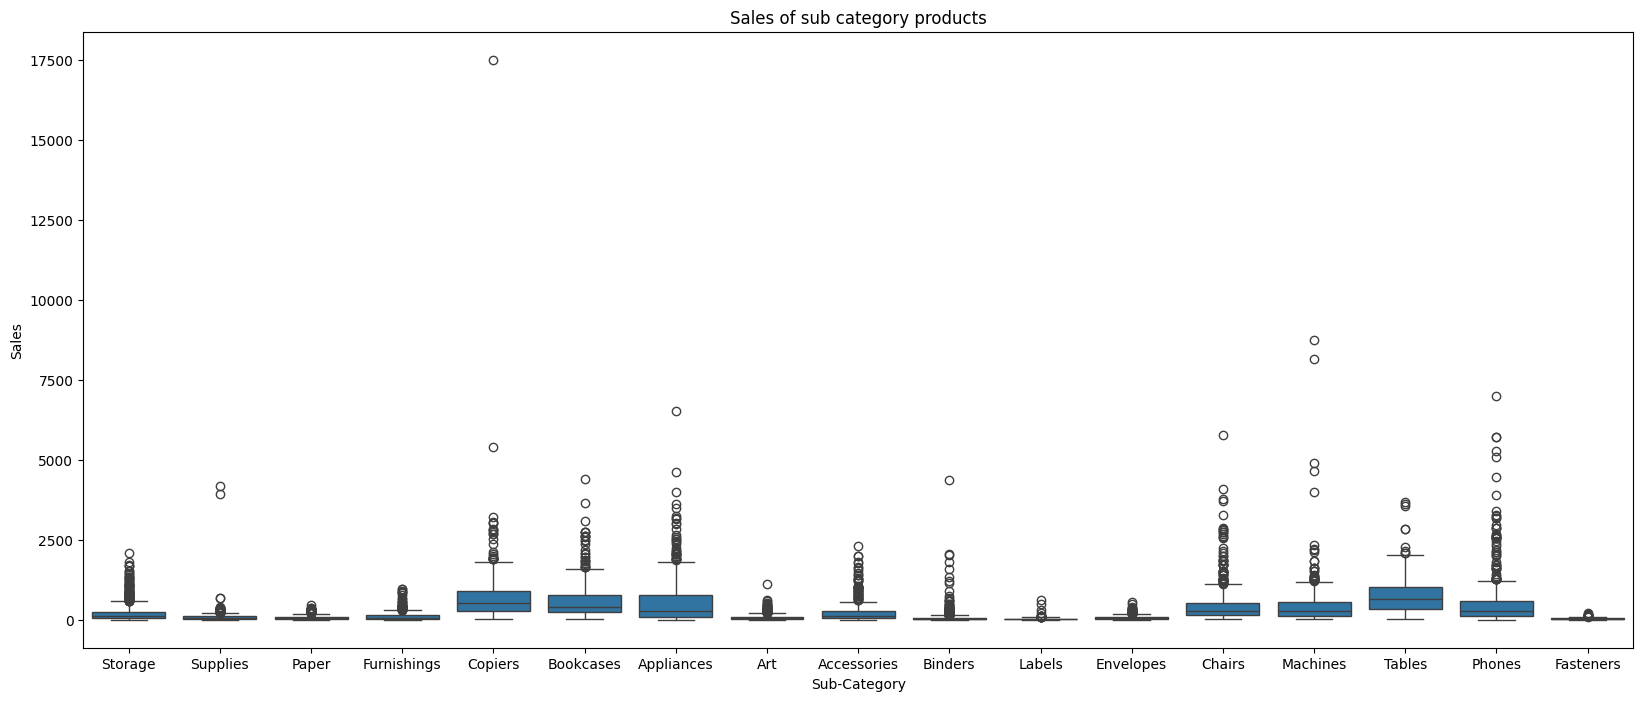

In [53]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Sub-Category",y="Sales",data= df)
plt.title('Sales of sub category products')

Text(0.5, 1.0, 'Sales in different Markets')

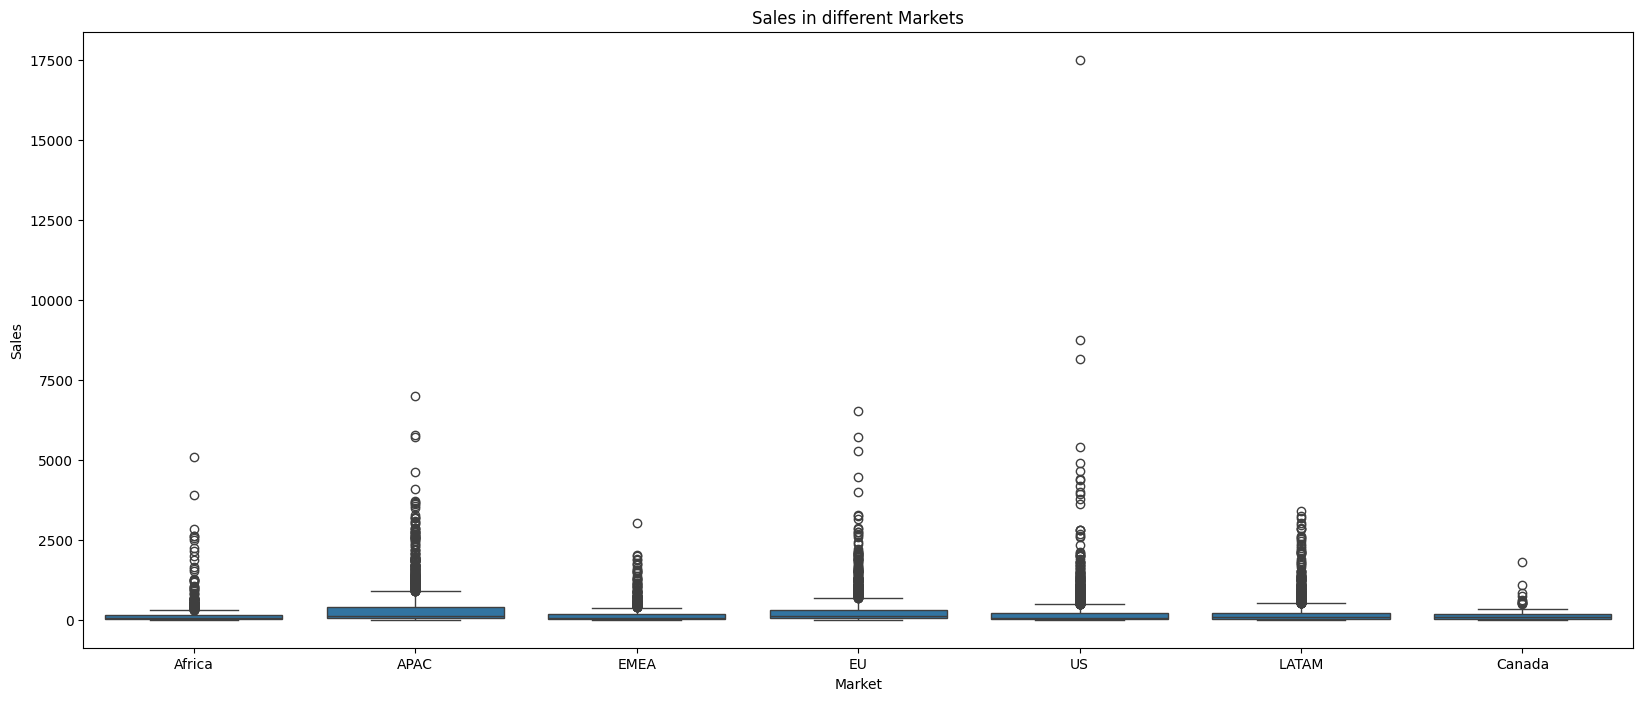

In [54]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Market",y="Sales",data= df)
plt.title('Sales in different Markets')

Text(0.5, 1.0, 'Country Wise Sales')

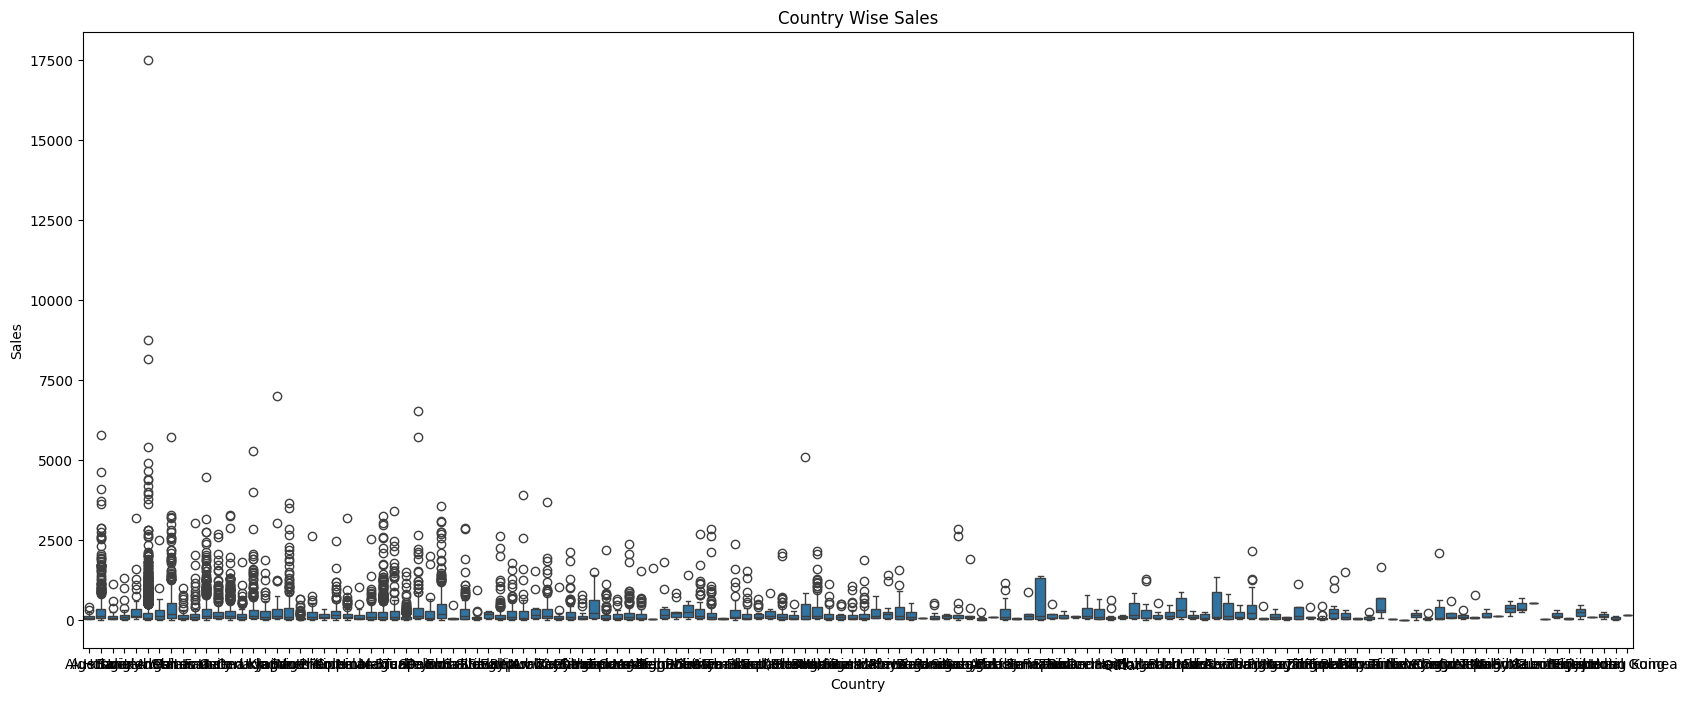

In [55]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Country",y="Sales",data= df)
plt.title('Country Wise Sales')

In [25]:
df.Country.unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Bangladesh',
       'United States', 'Angola', 'China', 'Panama', 'Iran', 'France',
       'Italy', 'Germany', 'Canada', 'United Kingdom', 'Ukraine', 'Japan',
       'Indonesia', 'Nigeria', 'South Korea', 'Peru', 'Philippines',
       'Colombia', 'Ireland', 'Nicaragua', 'Mexico', 'Brazil', 'Turkey',
       'Spain', 'Poland', 'India', 'Somalia', 'El Salvador', 'Sudan',
       'Slovakia', 'Egypt', 'Saudi Arabia',
       'Democratic Republic of the Congo', 'Norway', 'New Zealand',
       'Kenya', 'Cuba', 'Venezuela', 'Singapore', 'Honduras', 'Tanzania',
       'Dominican Republic', 'Morocco', 'Albania', 'Belgium',
       'Afghanistan', 'Bolivia', 'Vietnam', 'Guatemala', 'Guinea-Bissau',
       'Thailand', 'Iraq', 'Myanmar (Burma)', 'Ecuador', 'Netherlands',
       'Ghana', "Cote d'Ivoire", 'Austria', 'Argentina', 'Madagascar',
       'Russia', 'South Africa', 'Bosnia and Herzegovina', 'Malaysia',
       'Romania', 'Israel', 'Burundi', '

### b. Histogram – Distribution of Target Variable 

In [26]:
print(df.Sales.max())
print(df.Sales.min())

17499.95
0.898


(array([9.813e+03, 1.560e+02, 2.100e+01, 7.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([8.98000000e-01, 1.75080320e+03, 3.50070840e+03, 5.25061360e+03,
        7.00051880e+03, 8.75042400e+03, 1.05003292e+04, 1.22502344e+04,
        1.40001396e+04, 1.57500448e+04, 1.74999500e+04]),
 <BarContainer object of 10 artists>)

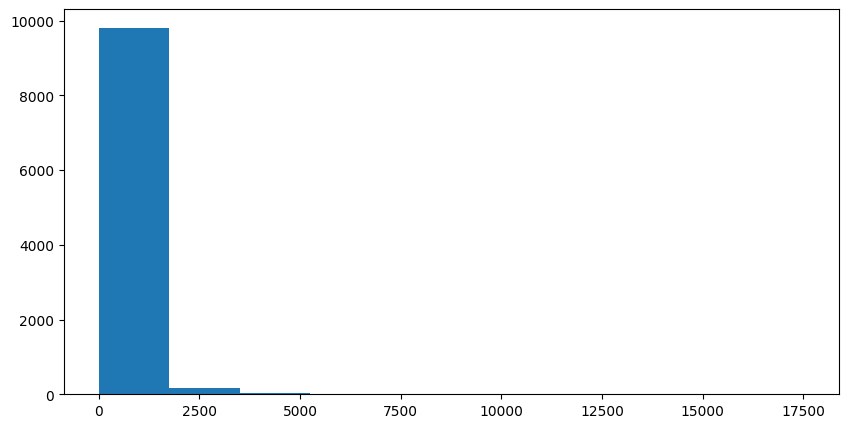

In [27]:
plt.figure(figsize=(10,5))
plt.hist(x='Sales',data=df,bins=10)

The histogram shows a highly skewed distribution of sales, where the majority of sales values are concentrated at lower ranges, with a few outliers extending to higher sales figures. This indicates that most sales transactions fall within a lower range, with very few instances of significantly higher sales.

### C. Distribution Plot – Target Variable 

<Axes: xlabel='Sales', ylabel='Density'>

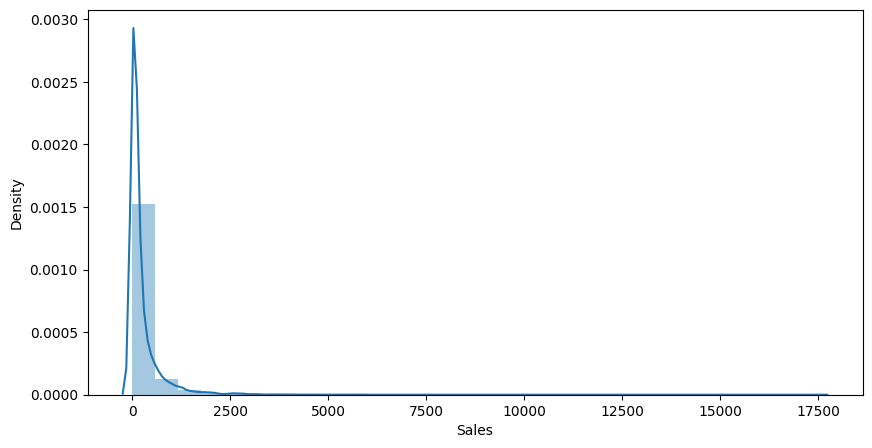

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(df['Sales'],bins=30)

The density plot of sales data, shown here, further illustrates the skewed distribution with a sharp peak at lower sales values, followed by a long tail towards higher values. This confirms that the majority of sales are clustered around lower amounts, while higher sales are much less frequent.

### d. Aggregation for all numerical Columns 

In [29]:
df.describe()

,Quantity,Discount,Profit,Shipping Cost,Sales
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.476200,0.142517,31.732623,26.256414,249.489614
std,2.248808,0.212472,183.146818,56.466485,502.207609
min,1.000000,0.000000,-1869.876000,0.010000,0.898000
25%,2.000000,0.000000,0.000000,2.700000,31.123750
50%,3.000000,0.000000,9.360000,7.770000,84.480000
75%,5.000000,0.200000,36.625500,24.390000,252.000000
max,14.000000,0.800000,8399.976000,923.630000,17499.950000


### e. Unique Values across all columns 

In [30]:
df.columns.values

array(['Order Date', 'Ship Date', 'Customer Name', 'Segment', 'City',
       'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Sales'], dtype=object)

In [31]:
columns_name=['No of Unique Values in each feature']

In [32]:
pd.DataFrame(df.nunique(),columns=columns_name)

,No of Unique Values in each feature
Order Date,342
Ship Date,539
Customer Name,795
Segment,3
City,1831
State,742
Country,132
Market,7
Region,13
Category,3


### f. Duplicate values across all columns

In [33]:
df1=pd.read_csv("retail.csv")

In [34]:
# Counting the number of duplicate rows in the new dataset.
df1.duplicated().sum()

0

 **Before deleting unique ID's of the record we can see there are no duplicates

In [35]:
df.duplicated().sum()

0

*As we observe above there are no duplicates in our data sets

### g. Correlation – Heatmap 

In [36]:
df.columns.values

array(['Order Date', 'Ship Date', 'Customer Name', 'Segment', 'City',
       'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Sales'], dtype=object)

In [37]:
# We’ll separate the categorical and numerical features into two different lists—this is helpful for further analysis.
categorical = ['Customer Name', 'Segment', 'City','State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
               'Product Name','Order Priority']

In [38]:
numerical = [x for x in df.columns.to_list() if x not in categorical]
numerical

['Order Date',
 'Ship Date',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Sales']

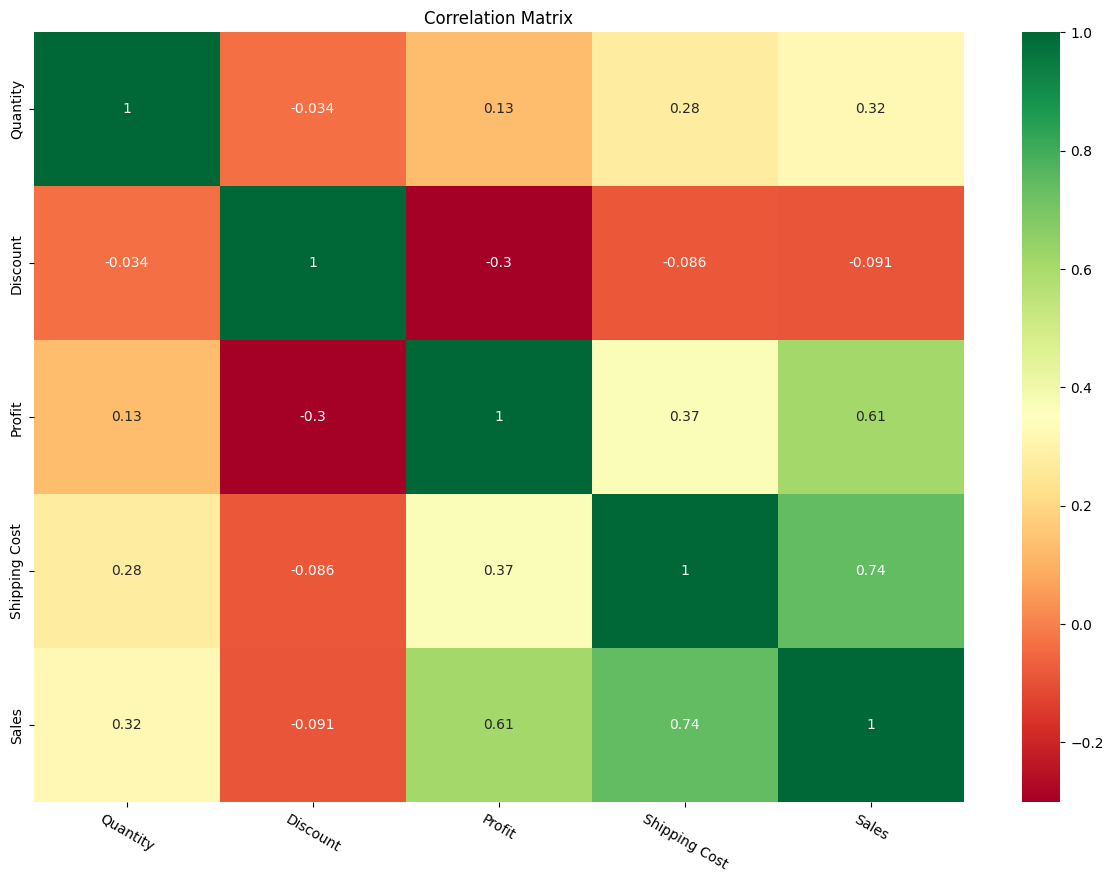

In [57]:
# Select only the numerical columns
numerical = df.select_dtypes(include=[float, int]).columns
corr_data = df[numerical]

# Calculate the correlation matrix
corr = corr_data.corr(method='pearson')

# Plot the correlation heatmap
plt.close()
cor_plot = sns.heatmap(corr, annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xticks(fontsize=10, rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


***As we can observe above,we can state following points***

    -Shipping cost and Sales are Maximum correlated(0.74)
    -next are Profit and Sales are correlated(0.61)
    -Discount and Sales has valuec closer to 0,so almost there is no correlation between them
    -Apparently,Profit and Discount are negatively coorelated
    -

In [40]:
df.columns.values

array(['Order Date', 'Ship Date', 'Customer Name', 'Segment', 'City',
       'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Sales'], dtype=object)

### h. Regression Plot

<Axes: xlabel='Quantity', ylabel='Sales'>

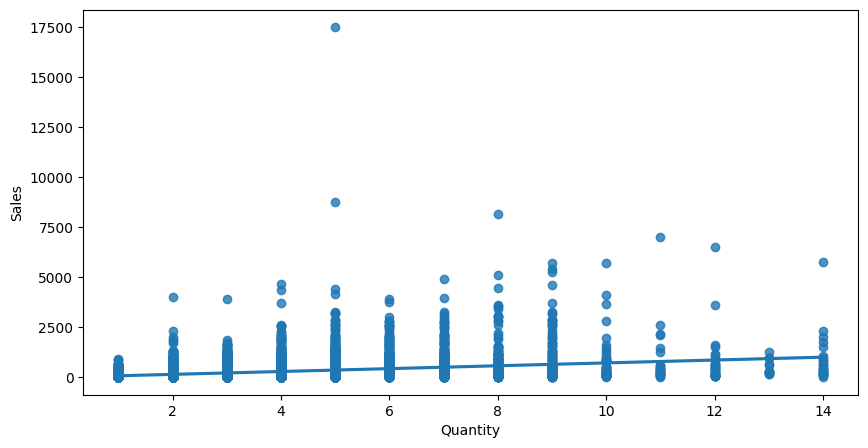

In [58]:
plt.figure(figsize=(10,5))
sns.regplot(x='Quantity',y='Sales',data=df)

<Axes: xlabel='Discount', ylabel='Sales'>

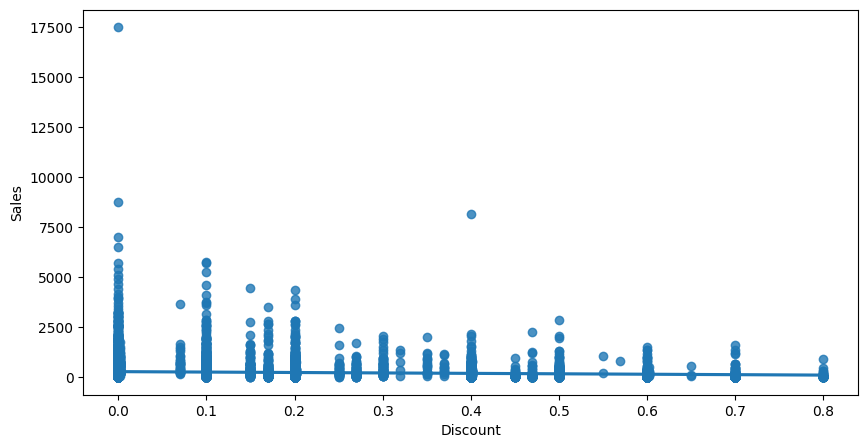

In [59]:
plt.figure(figsize=(10,5))
sns.regplot(x='Discount',y='Sales',data=df)

<Axes: xlabel='Shipping Cost', ylabel='Sales'>

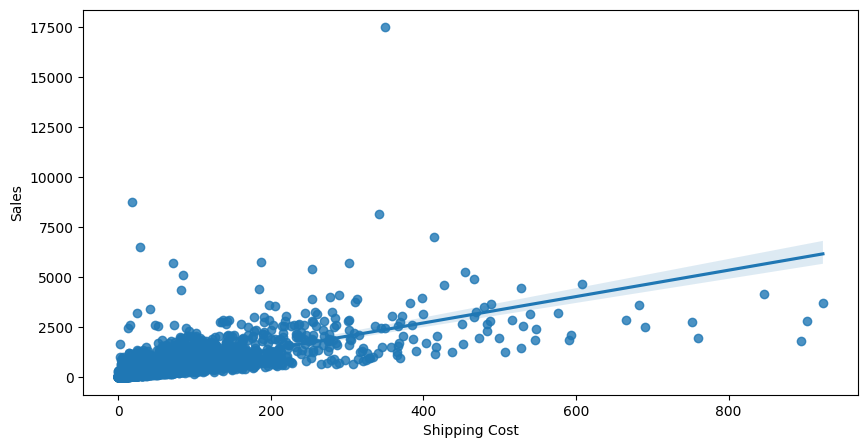

In [60]:
plt.figure(figsize=(10,5))
sns.regplot(x='Shipping Cost',y='Sales',data=df)

<Axes: xlabel='Profit', ylabel='Sales'>

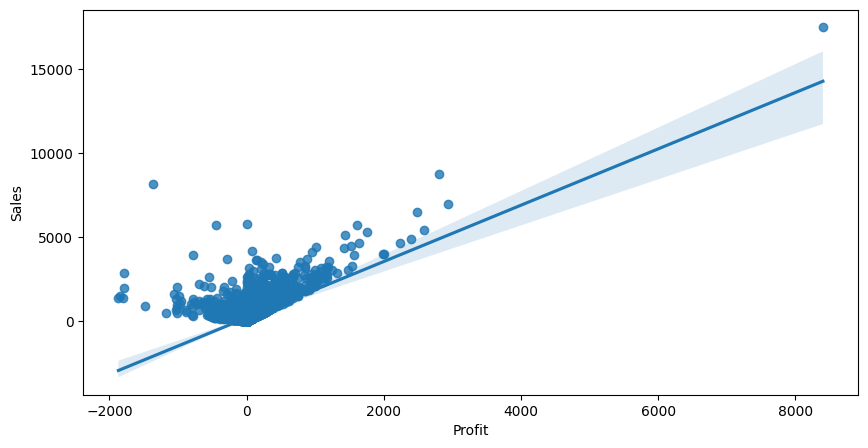

In [61]:
plt.figure(figsize=(10,5))
sns.regplot(x='Profit',y='Sales',data=df)

### i. Bar Plot 

**With Categorical against numerical Features

Text(0.5, 1.0, 'Segment Wise Sales')

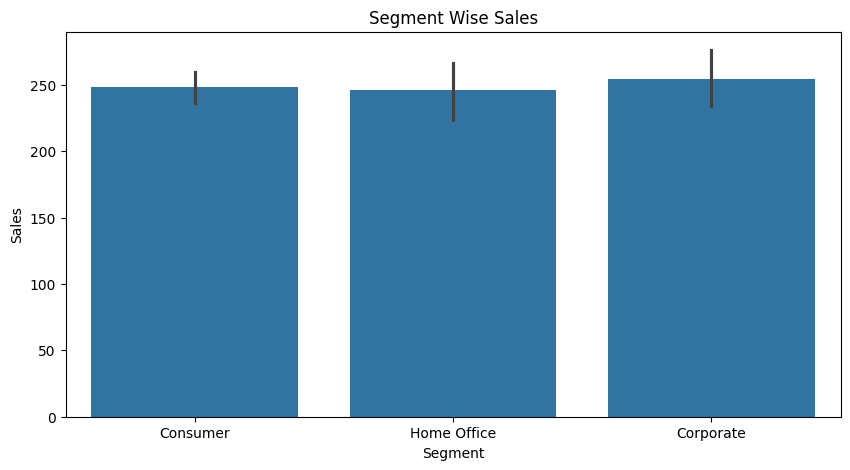

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x='Segment',y='Sales', data=df)
plt.title('Segment Wise Sales')

Text(0.5, 1.0, 'City Wise Sales')

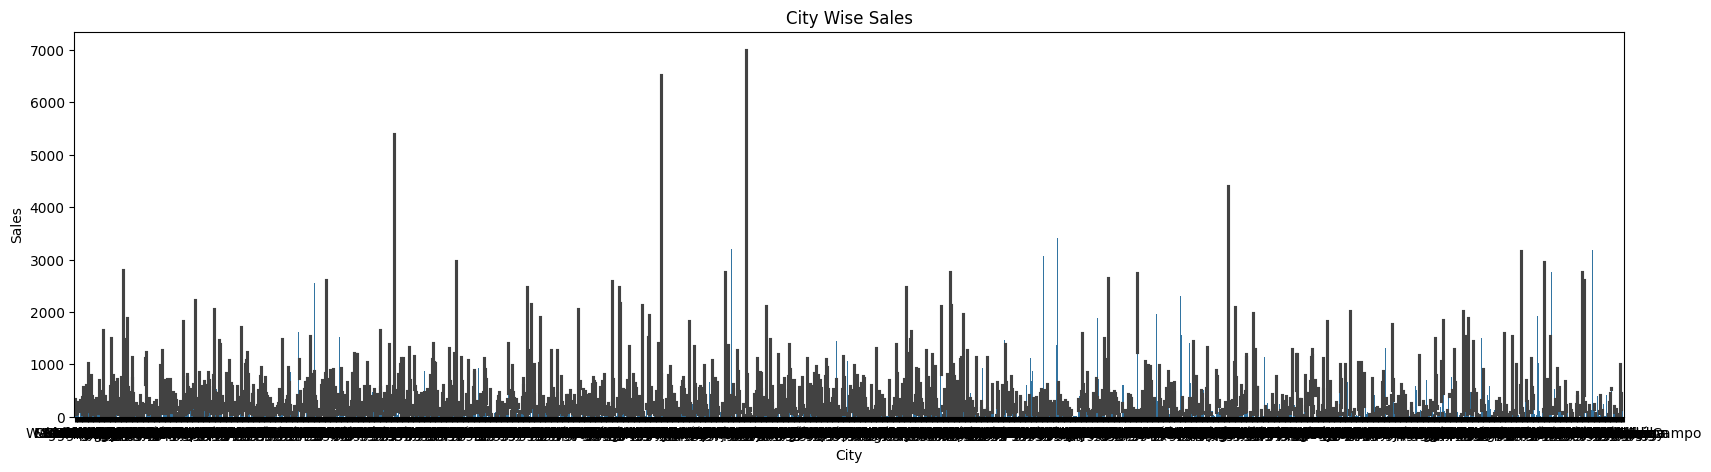

In [46]:
plt.figure(figsize=(20,5))
sns.barplot(x='City',y='Sales', data=df)
plt.title('City Wise Sales')

Text(0.5, 1.0, 'State Wise Sales')

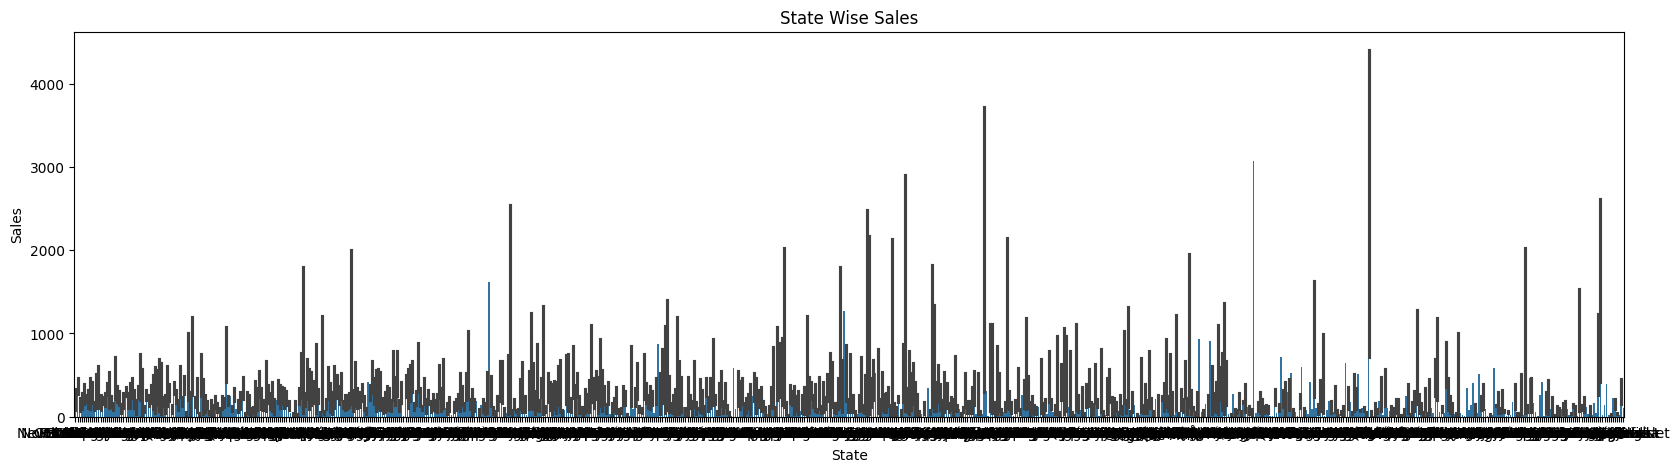

In [62]:
plt.figure(figsize=(20,5))
sns.barplot(x='State',y='Sales', data=df)
plt.title('State Wise Sales')

Text(0.5, 1.0, 'Country Wise Sales')

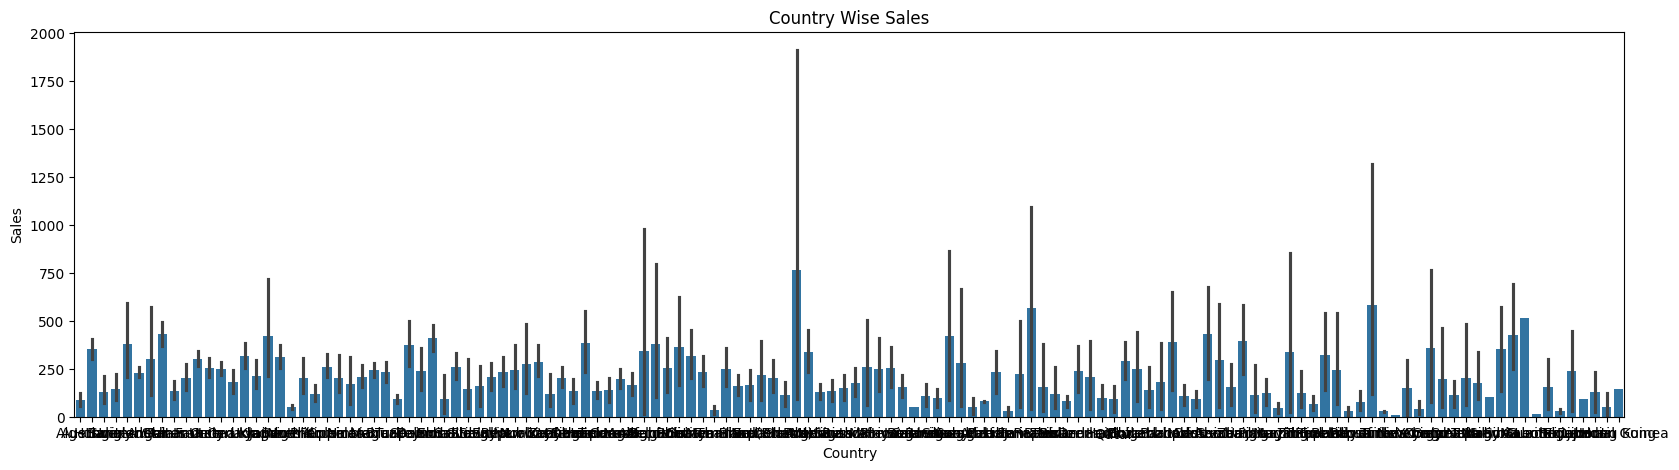

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Country',y='Sales', data=df)
plt.title('Country Wise Sales')

***Since there are 1831 unique values of city and 732 values of State,and 132 values of Country,the bar graph is bit difficult to infer using them,however if requried we can choose accordingly for analysis***

In [ ]:
##'Order Date', 'Ship Date', 'Customer Name', 'Segment', 'City','State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
##'Product Name', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
## 'Order Priority', 'Sales'

Text(0.5, 1.0, 'Market Wise Sales')

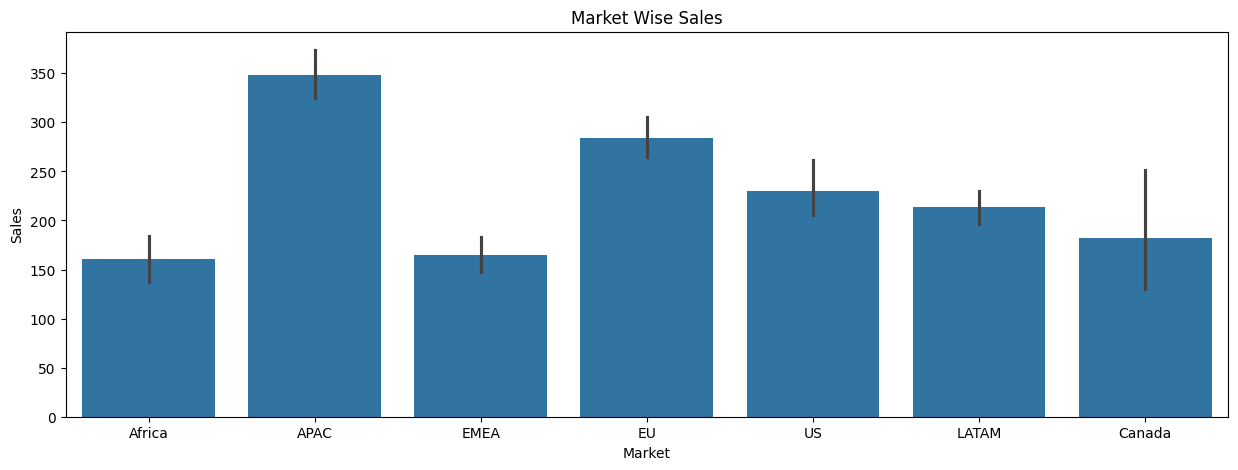

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(x='Market',y='Sales', data=df)
plt.title('Market Wise Sales')

Text(0.5, 1.0, 'Region Wise Sales')

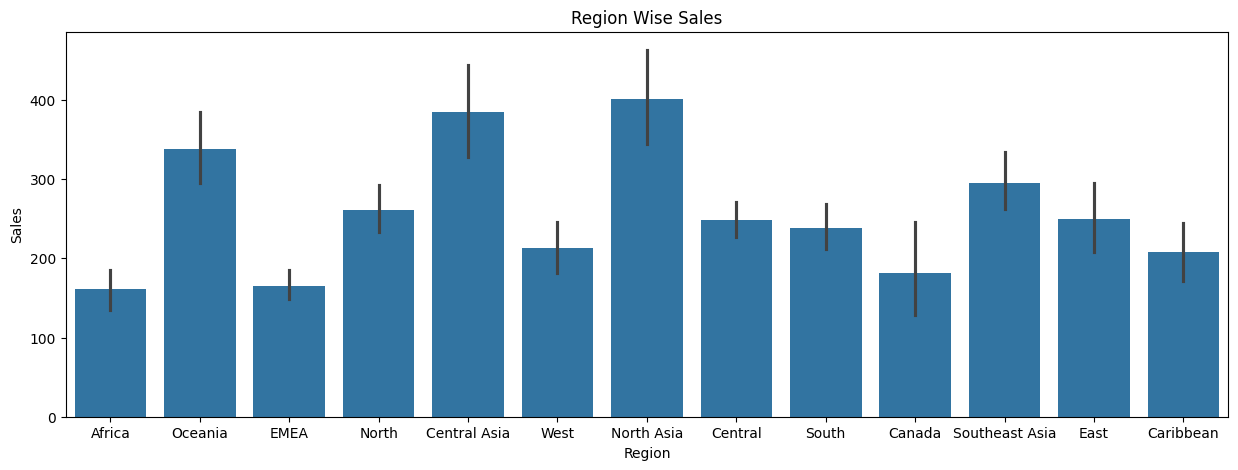

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(x='Region',y='Sales', data=df)
plt.title('Region Wise Sales')

Text(0.5, 1.0, 'Category Wise Sales')

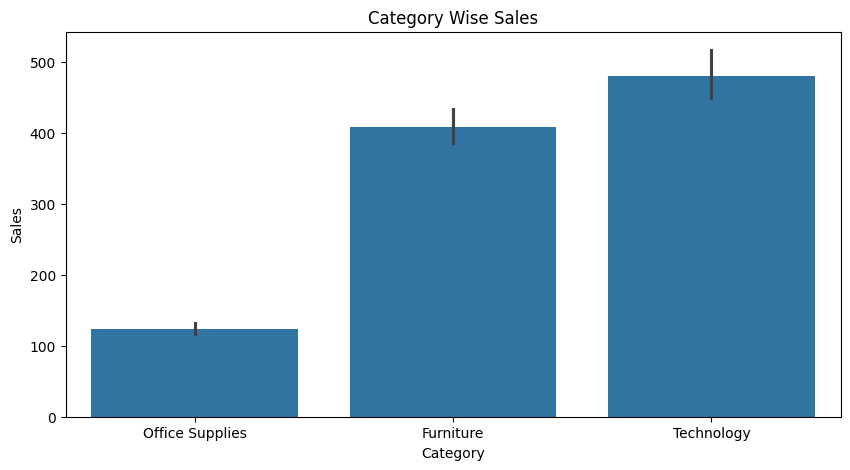

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category',y='Sales', data=df)
plt.title('Category Wise Sales')

Text(0.5, 1.0, 'Sub Category Wise Sales')

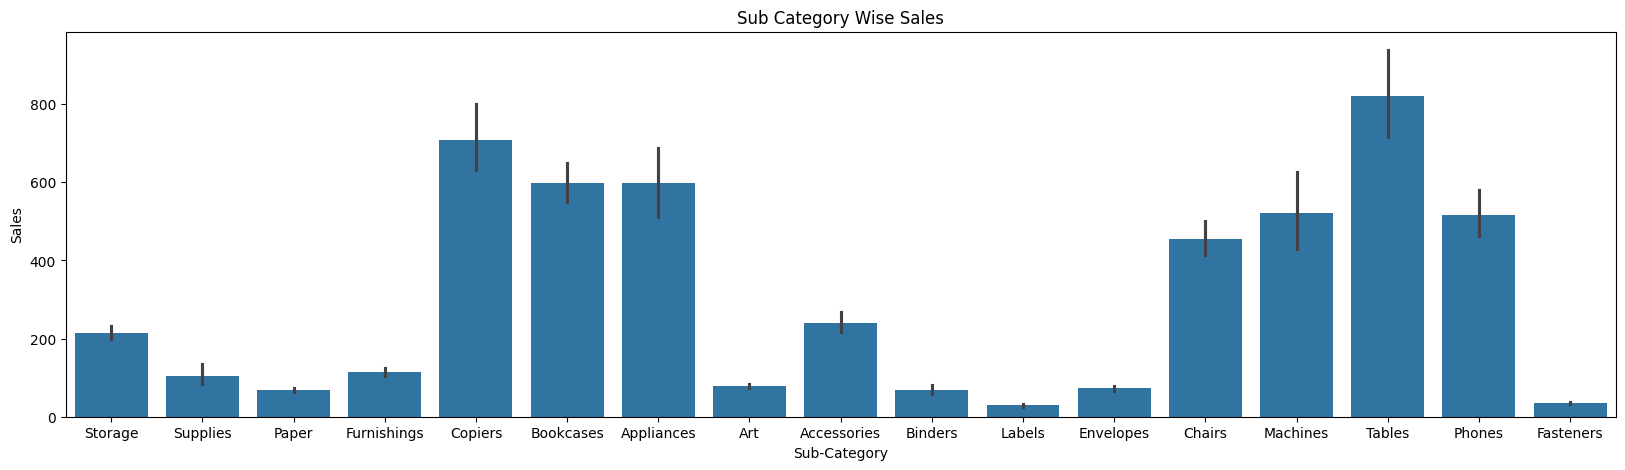

In [66]:
plt.figure(figsize=(20,5))
sns.barplot(x='Sub-Category',y='Sales', data=df)
plt.title('Sub Category Wise Sales')

Text(0.5, 1.0, 'Order Priority Wise Sales')

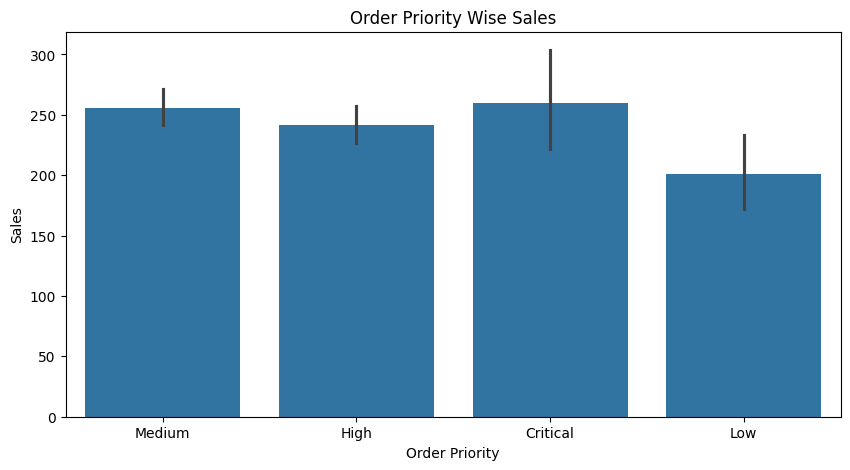

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(x='Order Priority',y='Sales', data=df)

plt.title('Order Priority Wise Sales')

<Figure size 1000x500 with 0 Axes>

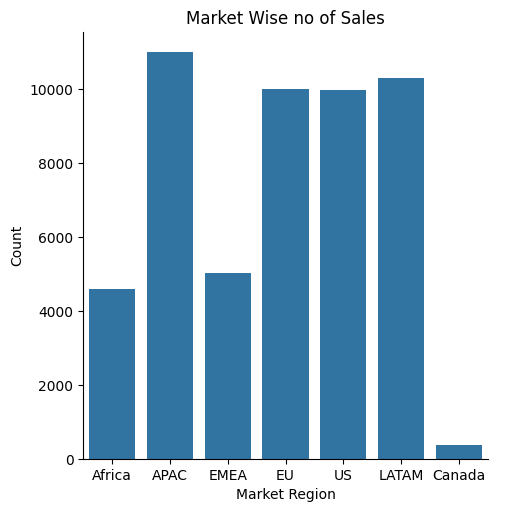

In [68]:
f1=pd.read_csv('retail.csv')
plt.figure(figsize=(10,5))
sns.catplot(x="Market", kind="count", data=f1)
plt.title('Market Wise no of Sales')
plt.ylabel('Count')
plt.xlabel('Market Region')
plt.show()

APAC tops all the Markets

**Top 10 Countries**

Text(0.5, 0, 'Countries')

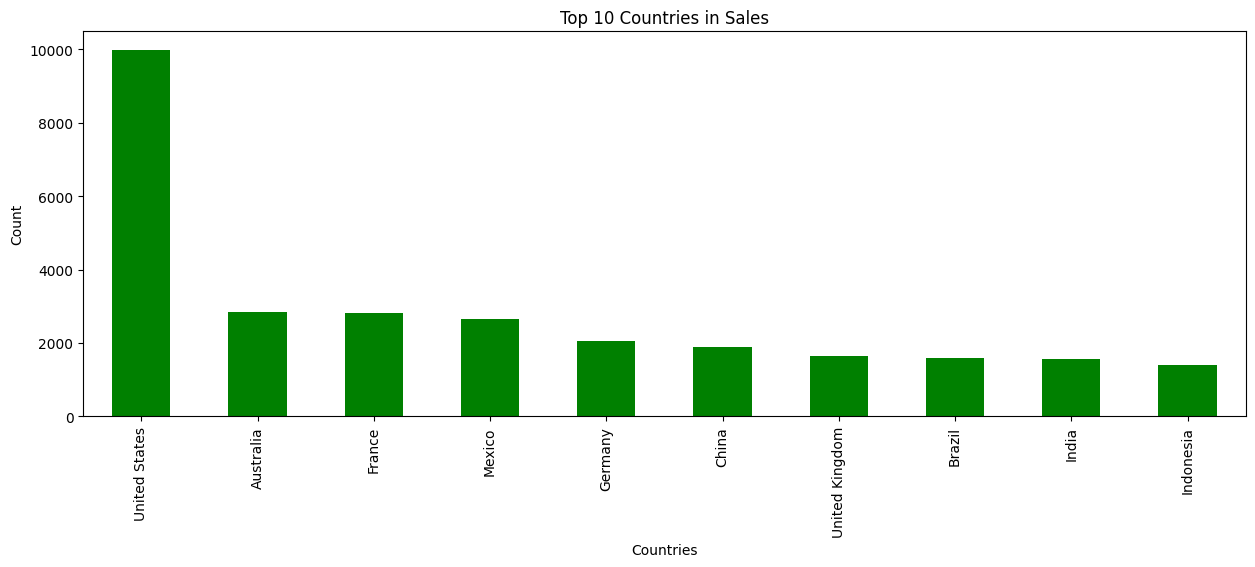

In [69]:
plt.figure(figsize=(15,5))
top10countries = f1.groupby('Country')['Row ID'].count().sort_values(ascending=False)
top10countries = top10countries [:10]
top10countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries in Sales')
plt.ylabel('Count')
plt.xlabel('Countries')

United States as a Country tops all the Countries in Sales


**Top 10 States**

Text(0.5, 0, 'States')

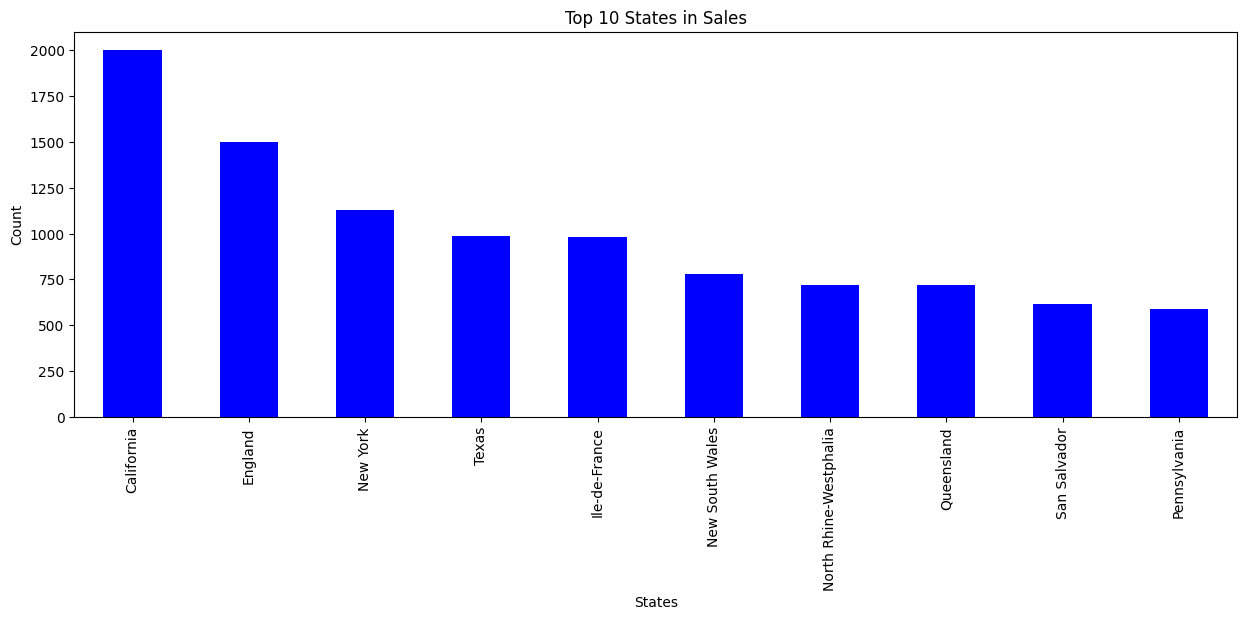

In [70]:
plt.figure(figsize=(15,5))
top10states = f1.groupby('State')['Row ID'].count().sort_values(ascending=False)
top10states = top10states [:10]
top10states.plot(kind='bar', color='blue')
plt.title('Top 10 States in Sales')
plt.ylabel('Count')
plt.xlabel('States')

California as a State tops all the States in Sales



**Top 10 Products**

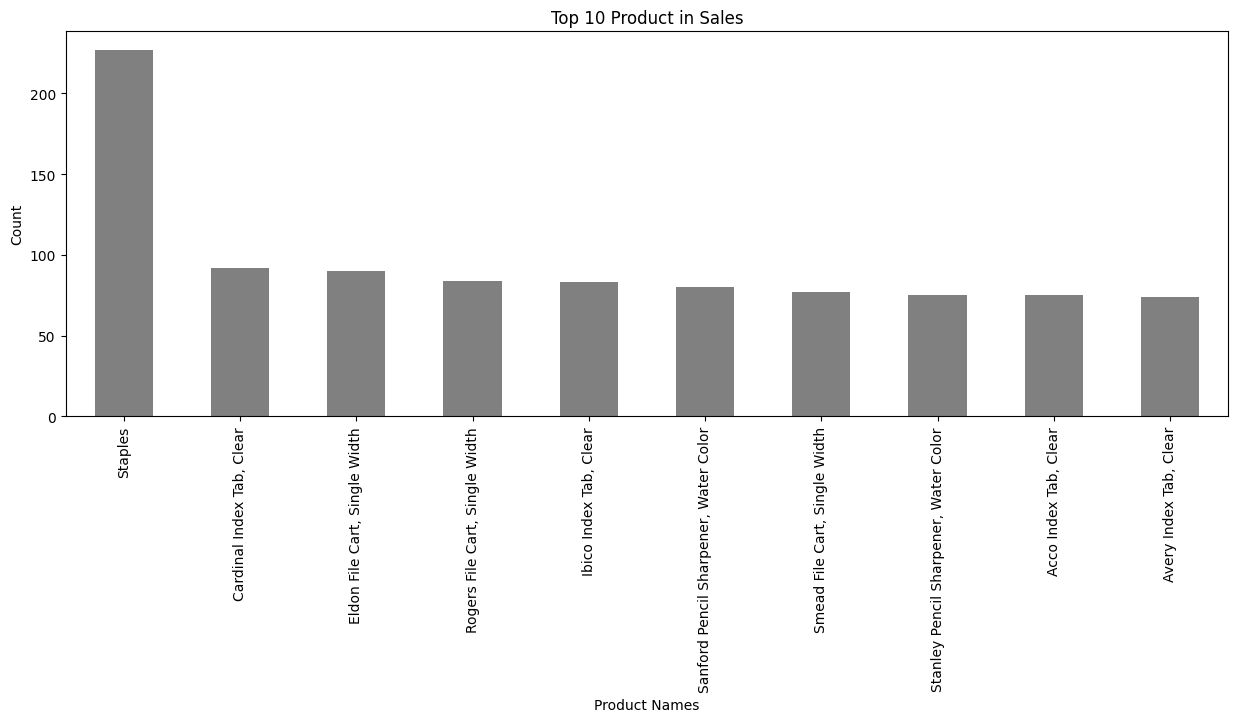

In [71]:
plt.figure(figsize=(15,5))
top10pn = f1.groupby('Product Name')['Row ID'].count().sort_values(ascending=False)
top10pn = top10pn [:10]
top10pn.plot(kind='bar', color='grey')
plt.title('Top 10 Product in Sales')
plt.ylabel('Count')
plt.xlabel('Product Names')
plt.show()

Staples tops all the Products in Sales



**Plotting top 10 customers**

<Axes: xlabel='Customer Name', ylabel='Sales'>

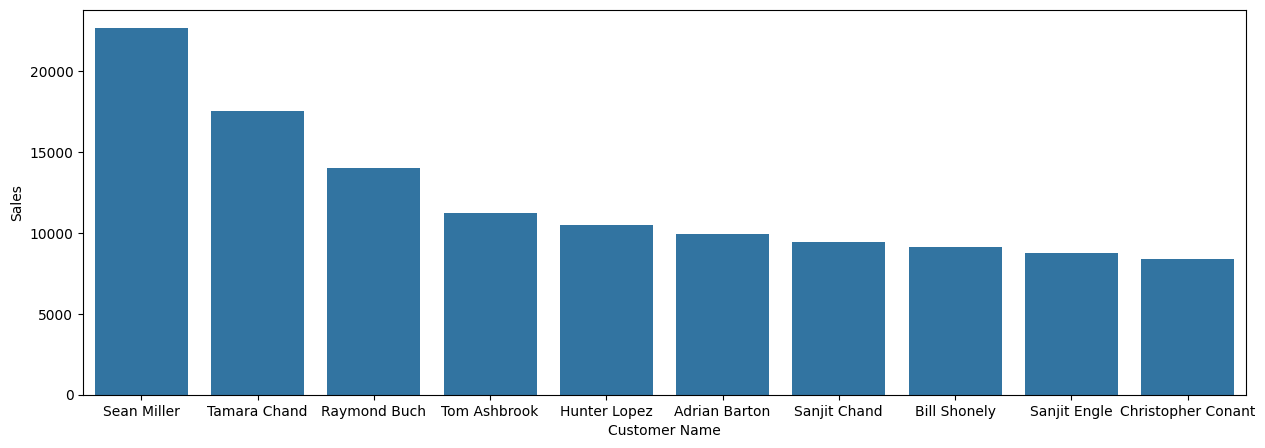

In [72]:
plt.figure(figsize=(15,5))
bar_width = 0.2
opacity= 0.8
top10profit = f1.sort_values('Sales', ascending=False)
top10 = top10profit.head(10)
top10[['Customer Name', 'Sales']]
sns.barplot(x = "Customer Name", y= "Sales", data=top10)  

Sean Miller top customer in terms of Sales

**Region wise total Sales**

Text(0.5, 0, 'Regions')

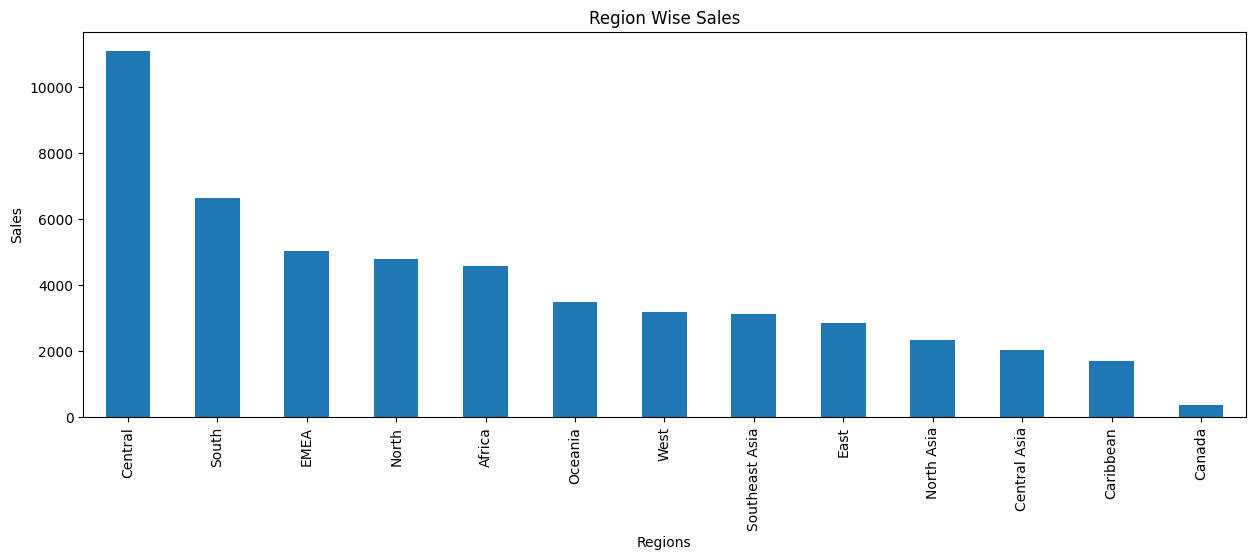

In [73]:
plt.figure(figsize=(15,5))
f1['Region'].value_counts().plot.bar()
plt.title('Region Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Regions')

Central Region tops all the Sales in Regions

**Ship mode wise no of sales**

Text(0.5, 28.999999999999986, 'Ship Modes')

<Figure size 1200x500 with 0 Axes>

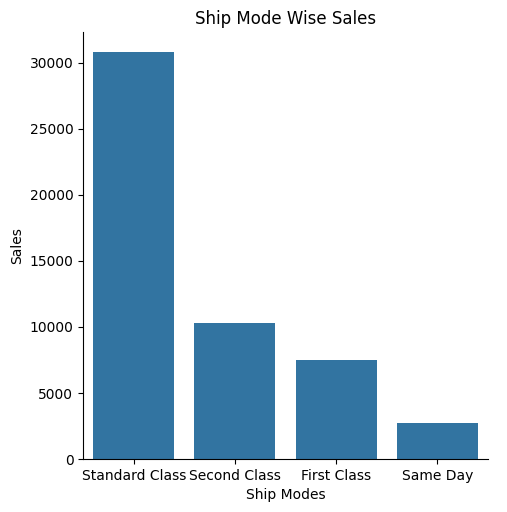

In [74]:
plt.figure(figsize=(12,5))
sns.catplot(x="Ship Mode", kind="count", data=f1)
plt.title('Ship Mode Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Ship Modes')

Standard Class is the top in Transport Methods

### j. Pair plot 

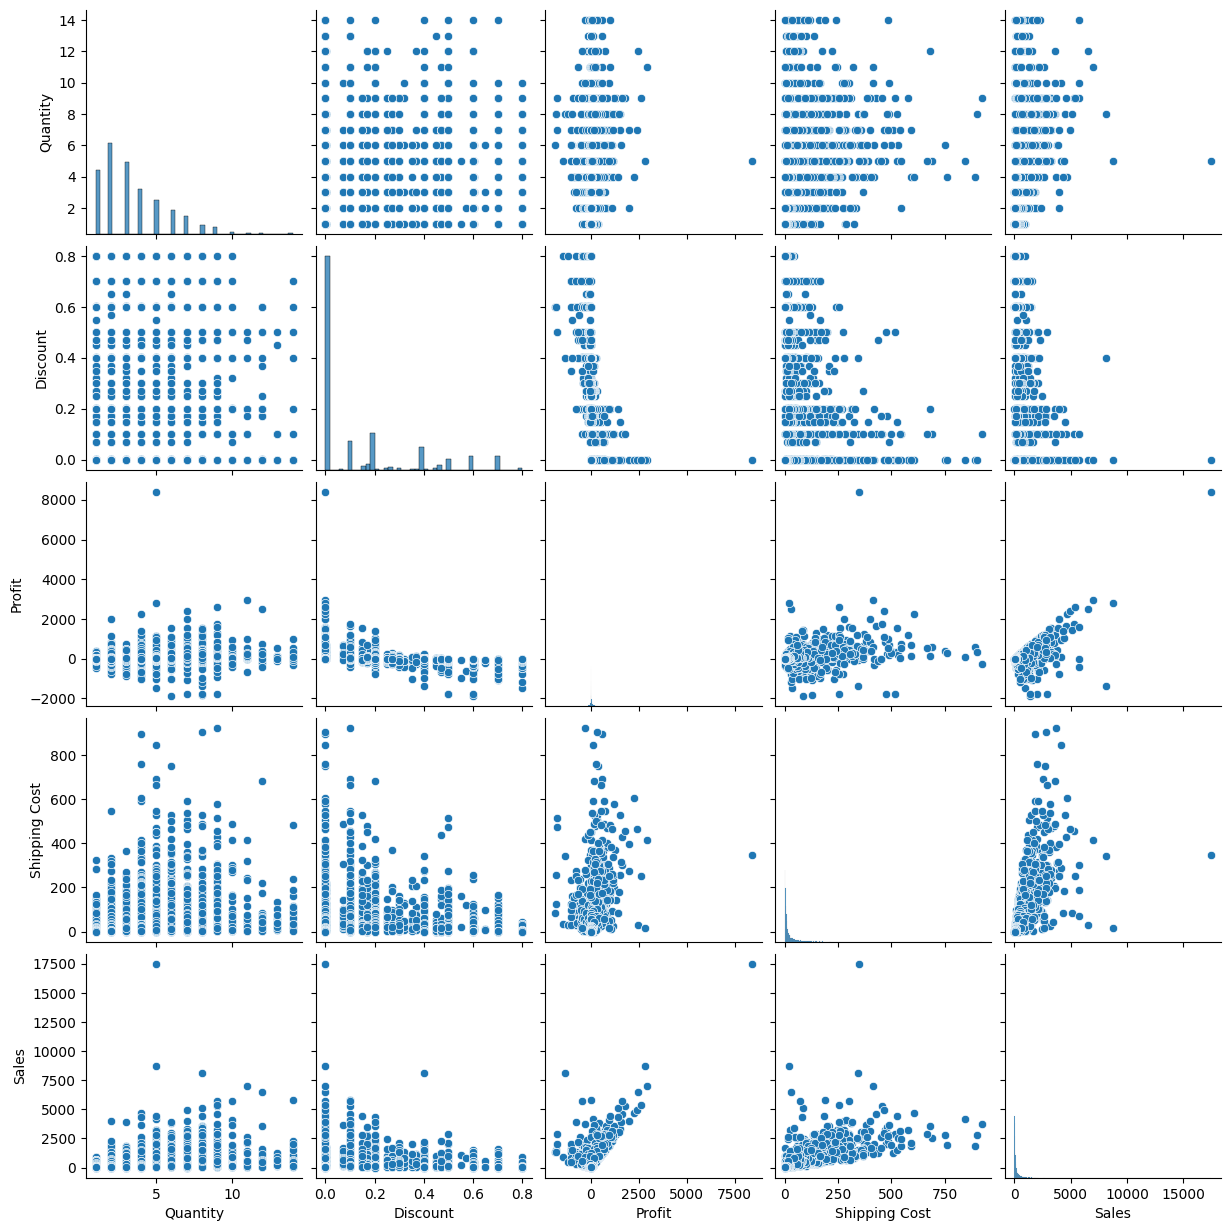

In [75]:
sns.pairplot(df)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      10000 non-null  object 
 1   Ship Date       10000 non-null  object 
 2   Customer Name   10000 non-null  object 
 3   Segment         10000 non-null  object 
 4   City            10000 non-null  object 
 5   State           10000 non-null  object 
 6   Country         10000 non-null  object 
 7   Market          10000 non-null  object 
 8   Region          10000 non-null  object 
 9   Category        10000 non-null  object 
 10  Sub-Category    10000 non-null  object 
 11  Product Name    10000 non-null  object 
 12  Quantity        10000 non-null  int64  
 13  Discount        10000 non-null  float64
 14  Profit          10000 non-null  float64
 15  Shipping Cost   10000 non-null  float64
 16  Order Priority  10000 non-null  object 
 17  Sales           10000 non-null  

***Converting data types of Order Date and Ship Date***

In [78]:
# Handle mixed date formats
f1['Order Date'] = pd.to_datetime(f1['Order Date'], dayfirst=True, errors='coerce')


In [80]:
f1['Ship Date'] = pd.to_datetime(f1['Ship Date'], dayfirst=True, errors='coerce')

In [81]:
f1['year'] = pd.DatetimeIndex(f1['Order Date']).year
df.head(2)

,Order Date,Ship Date,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
0,1/1/2011,6/1/2011,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",2,0.0,106.140,35.46,Medium,408.300
1,1/1/2011,8/1/2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",3,0.1,36.036,9.72,Medium,120.366


<Axes: xlabel='year', ylabel='Sales'>

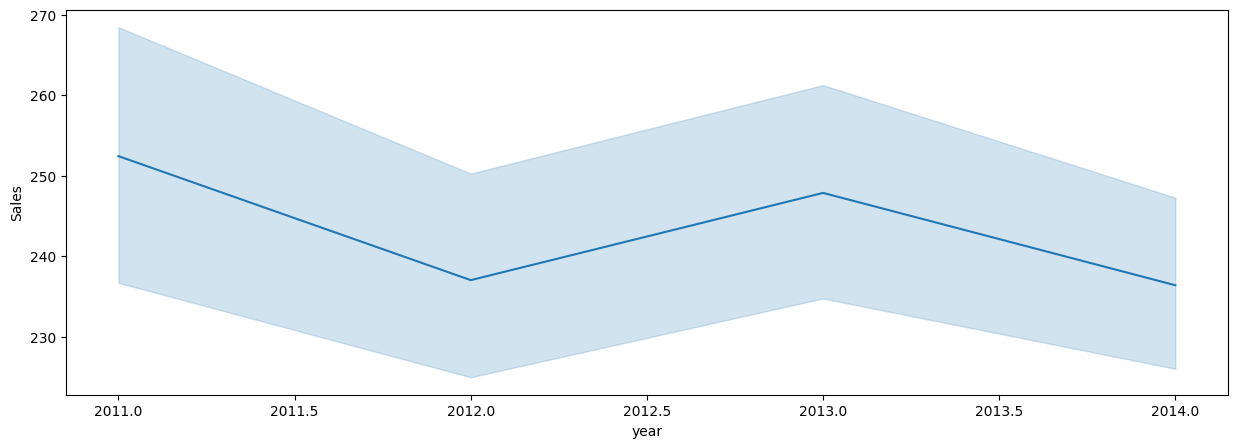

In [82]:
plt.figure(figsize=(15,5))
sns.lineplot(x="year", y="Sales", data=f1)

### 2. Drop all duplicate rows 

In [83]:
df.duplicated().sum()

0

**It returns a Boolean Series with True value for each duplicated row**

   **Arguments**:

   **subset :
             Single or multiple column labels which should used for duplication check. If not provides all columns                           will checked for finding duplicate rows**.
             
   **keep :
           Denotes the occurrence which should be marked as duplicate. It’s value can be {‘first’, ‘last’, False},
           default value is ‘first’**

In [84]:
df.drop_duplicates(keep='first').shape

(10000, 18)

**As we can Observe we have ZERO duplicate rows in the data**

### 3. Drop all non-essential features

In [85]:
df.Region.unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

In [86]:
#One-Hot Encoding on Region and Sales
df2=pd.get_dummies(df[['Region','Sales']],drop_first=True)
df2.head(2)

,Sales,Region_Canada,Region_Caribbean,Region_Central,Region_Central Asia,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West
0,408.300,False,False,False,False,False,False,False,False,False,False,False,False
1,120.366,False,False,False,False,False,False,False,False,True,False,False,False


<Axes: >

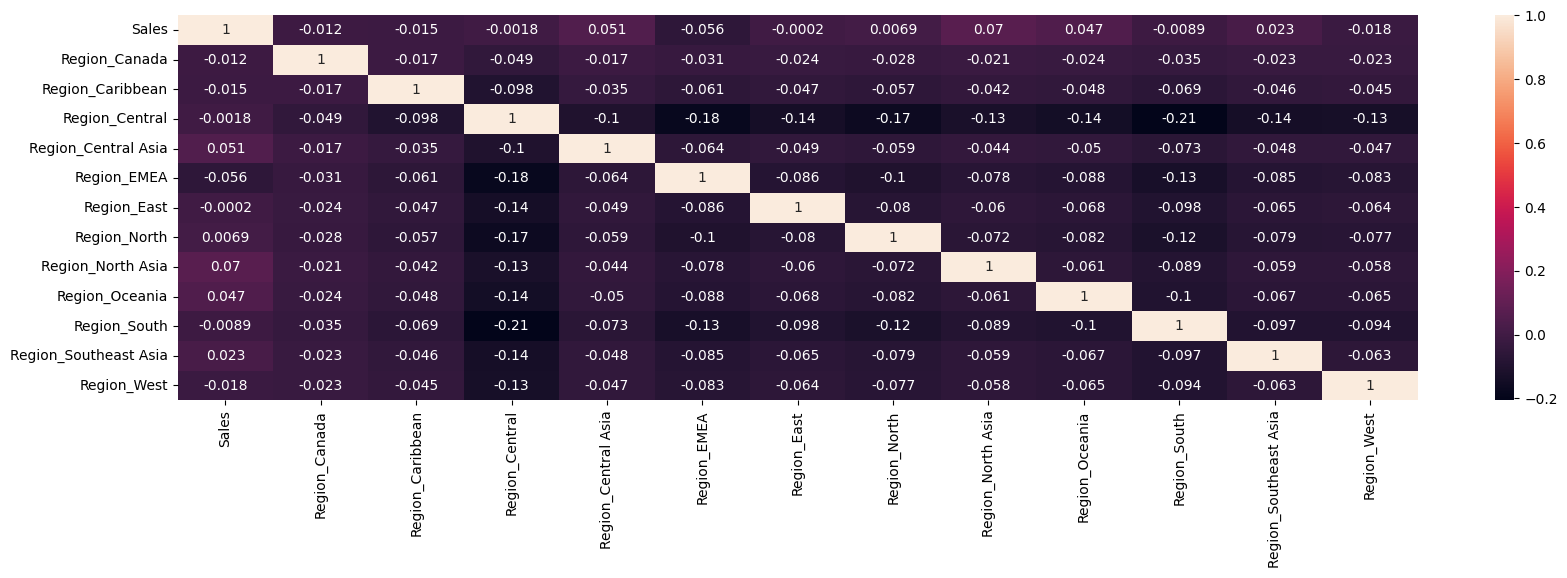

In [87]:
plt.figure(figsize=(20,5))
sns.heatmap(df2.corr(),annot=True)

In [88]:
#One-Hot Encoding on Market and Sales
df3=pd.get_dummies(df[['Market','Sales']],drop_first=True)
df3.head(2)

,Sales,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US
0,408.300,True,False,False,False,False,False
1,120.366,False,False,False,False,False,False


<Axes: >

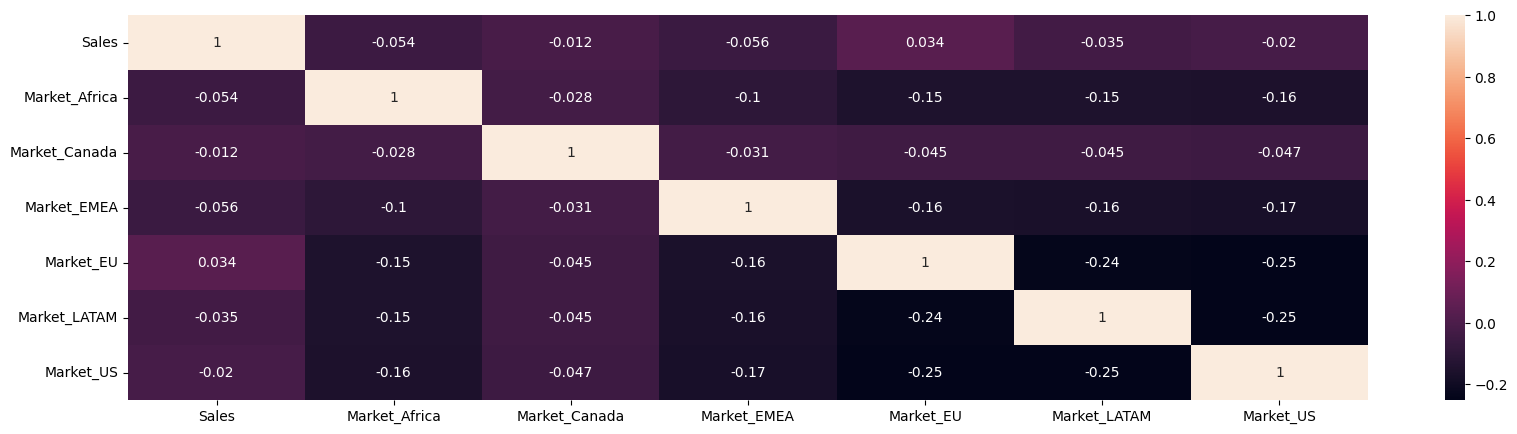

In [89]:
plt.figure(figsize=(20,5))
sns.heatmap(df3.corr(),annot=True)

In [90]:
df3=pd.get_dummies(df[['Category','Sales']],drop_first=True)
df3.head(2)

,Sales,Category_Office Supplies,Category_Technology
0,408.300,True,False
1,120.366,True,False


<Axes: >

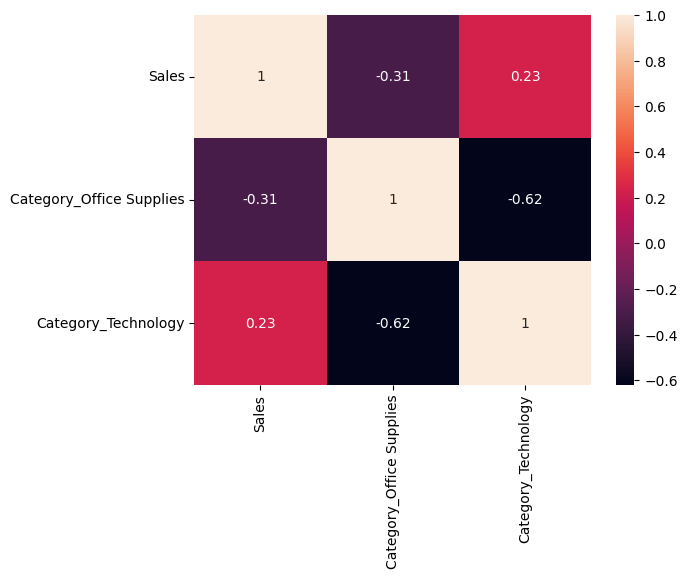

In [91]:
sns.heatmap(df3.corr(),annot=True)

In [92]:
df4=pd.get_dummies(df[['Sub-Category','Sales']],drop_first=True)
df4.head(2)

,Sales,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,408.300,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,120.366,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


<Axes: >

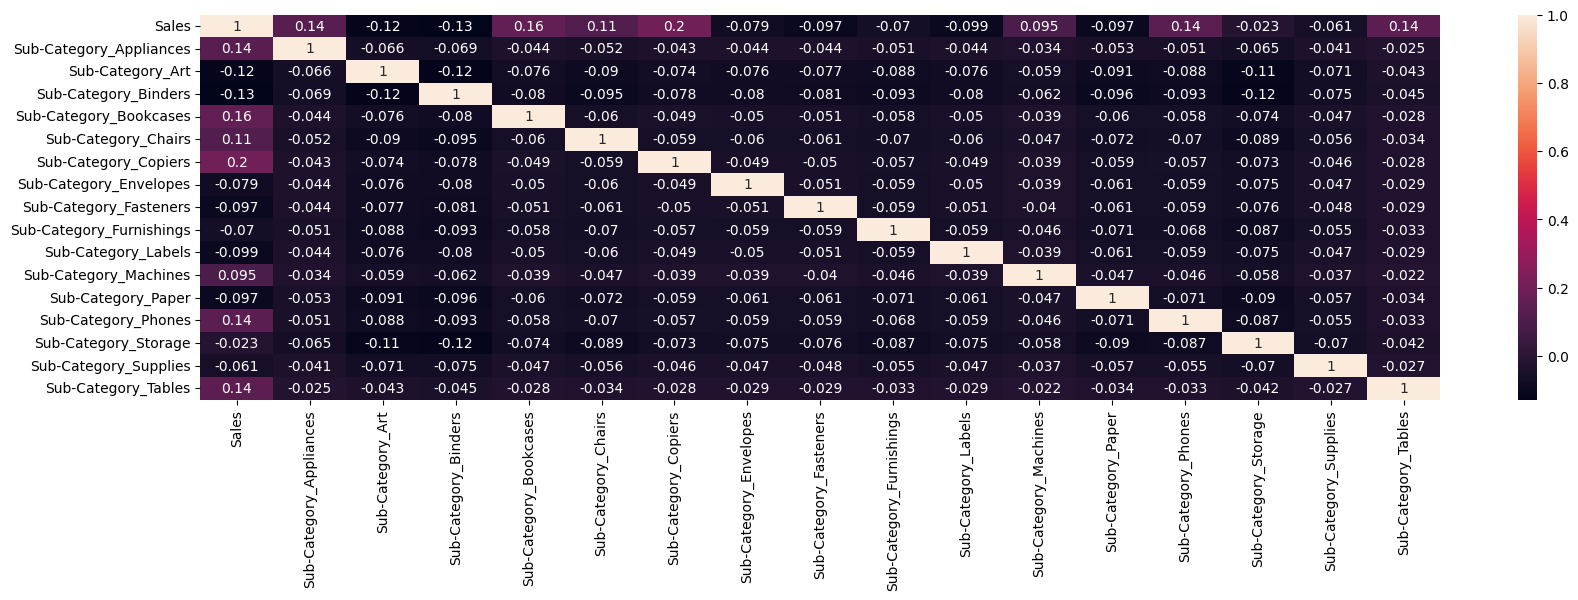

In [93]:
plt.figure(figsize=(20,5))
sns.heatmap(df4.corr(),annot=True)

***According to obvservation above ,we can update data as follows***

     1.MARKET,REGION and CATEGORY,SUB-CATEGORY are negatively correlated as well as has no coorelation with SALES ,which               logically says that  MARKET,REGION constitues for CITY,COUNTRY,STATES and also Category,Sub_Category constitutes for            Product Name .which we can take them down
     
     2.We can drop Customer Name,Product ID,Customer ID,Row ID as they no impact on Sales

In [94]:
df.drop(['Customer Name','City','State','Country','Market','Region','Product Name'],axis=1,inplace=True)

In [95]:
df.drop(['Order Date','Ship Date'],axis=1,inplace=True)
df.head(2)


,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
0,Consumer,Office Supplies,Storage,2,0.0,106.140,35.46,Medium,408.300
1,Consumer,Office Supplies,Supplies,3,0.1,36.036,9.72,Medium,120.366


### 5.Calculate Z score to validate whether outliers are still present or not

In [96]:
df.isnull().sum()

Segment           0
Category          0
Sub-Category      0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Sales             0
dtype: int64

In [97]:
df.describe()

,Quantity,Discount,Profit,Shipping Cost,Sales
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.476200,0.142517,31.732623,26.256414,249.489614
std,2.248808,0.212472,183.146818,56.466485,502.207609
min,1.000000,0.000000,-1869.876000,0.010000,0.898000
25%,2.000000,0.000000,0.000000,2.700000,31.123750
50%,3.000000,0.000000,9.360000,7.770000,84.480000
75%,5.000000,0.200000,36.625500,24.390000,252.000000
max,14.000000,0.800000,8399.976000,923.630000,17499.950000


i>>QUANTITY- Feature

<Axes: xlabel='Quantity'>

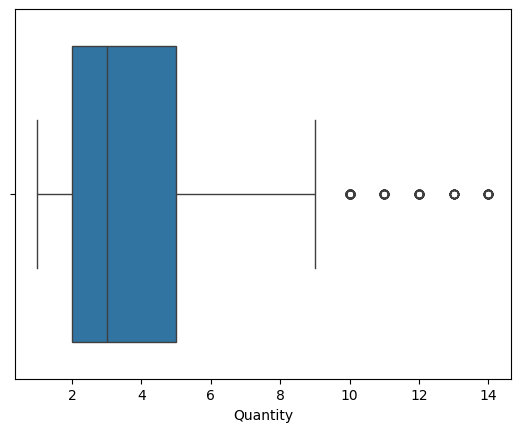

In [99]:
sns.boxplot(x='Quantity', data=df)


In Quantity,we cannot remove outliers,depending on discount,product will be sold more,hence we will be having some products different from usual

ii>>>DISCOUNT-Feature

<Axes: xlabel='Discount'>

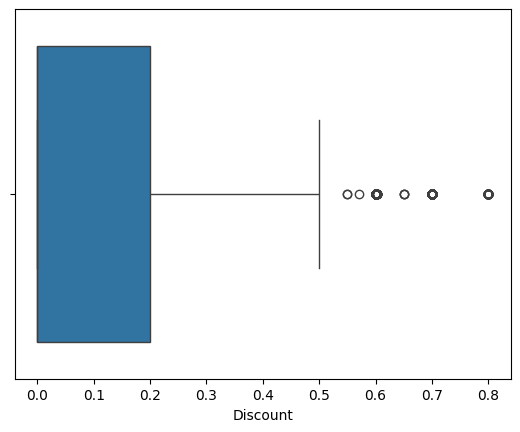

In [101]:
sns.boxplot(x='Discount',data=df)

(array([5778.,  889., 1165.,  184.,   37.,  823.,  293.,  399.,  369.,
          63.]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ]),
 <a list of 10 Patch objects>)

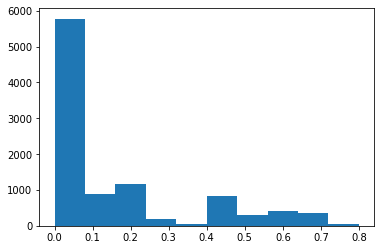

In [ ]:
plt.hist(x='Discount',data=df,bins=10)

Here also if we observe,we have some unusual discounts crossing 50% ,sometimes stores put discount more to sell off RTC products

iii>> PROFIT-Feature

<Axes: xlabel='Profit'>

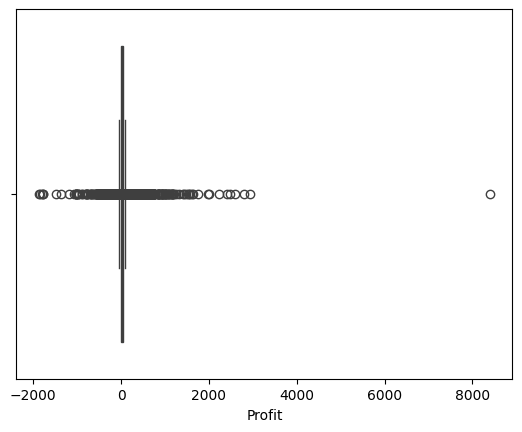

In [102]:
sns.boxplot(x='Profit',data=df)

(array([2.00e+01, 9.35e+03, 6.10e+02, 1.40e+01, 5.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([-1869.88,  -842.89,   184.09,  1211.08,  2238.06,  3265.05,
         4292.04,  5319.02,  6346.01,  7372.99,  8399.98]),
 <a list of 10 Patch objects>)

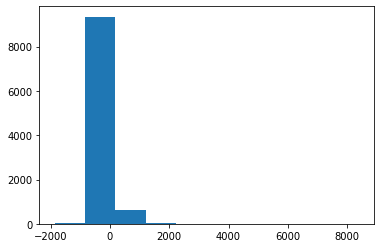

In [ ]:
plt.hist(x='Profit',data=df,bins=10)

In [103]:
df[df.Profit>3000]

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
8898,Corporate,Technology,Copiers,5,0.0,8399.976,349.07,Medium,17499.95


As we can see,we have an outlier after 4000,which is excess,so we will drop it

In [104]:
df.drop(8898,inplace=True)

<Axes: xlabel='Profit', ylabel='Sales'>

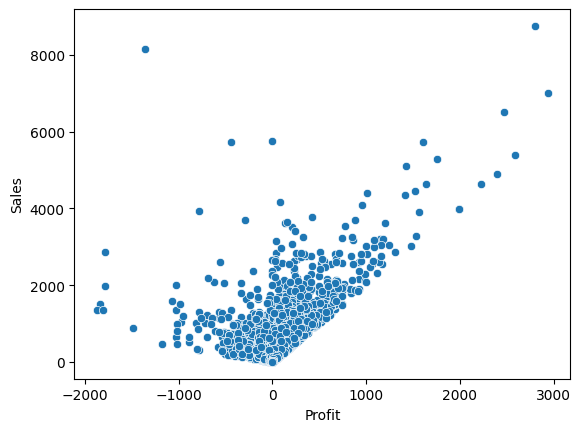

In [105]:
sns.scatterplot(x='Profit',y='Sales',data=df)

***On the negative side also we have bit outiers,we will replace them with Lower limit(1.5 X IQR),and basicallly on the negative profit means its the loss incurred due to more amount of discount on the products***

In [106]:
Q1=df['Profit'].quantile(q=0.25)
Q3=df['Profit'].quantile(q=0.75)
print('25th percentile and 75 percentile are:',Q1,Q3)
IQR=Q3-Q1
print('Inter quartile range=',IQR)
upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)
print('Upper limit is :',upper_limit)
print('Lower limit is :',lower_limit)      

25th percentile and 75 percentile are: 0.0 36.612
Inter quartile range= 36.612
Upper limit is : 91.53
Lower limit is : -54.918000000000006


In [107]:
df["Profit"] = np.where(df["Profit"]<-1200, -54.918000000000006,df['Profit'])
df.head(2)

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
0,Consumer,Office Supplies,Storage,2,0.0,106.140,35.46,Medium,408.300
1,Consumer,Office Supplies,Supplies,3,0.1,36.036,9.72,Medium,120.366


In [108]:
df.describe()

,Quantity,Discount,Profit,Shipping Cost,Sales
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,3.476048,0.142531,32.050009,26.224129,247.764396
std,2.248869,0.212478,156.251528,56.376936,471.668253
min,1.000000,0.000000,-1181.282400,0.010000,0.898000
25%,2.000000,0.000000,0.000000,2.700000,31.122500
50%,3.000000,0.000000,9.360000,7.770000,84.480000
75%,5.000000,0.200000,36.612000,24.390000,251.895000
max,14.000000,0.800000,2939.310000,923.630000,8749.950000


<Axes: xlabel='Profit', ylabel='Sales'>

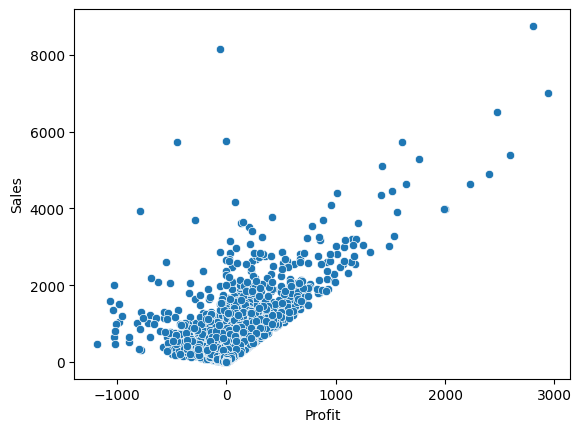

In [109]:
sns.scatterplot(x='Profit',y='Sales',data=df)

iv>>SHIPPING COST-Feature

<Axes: xlabel='Shipping Cost'>

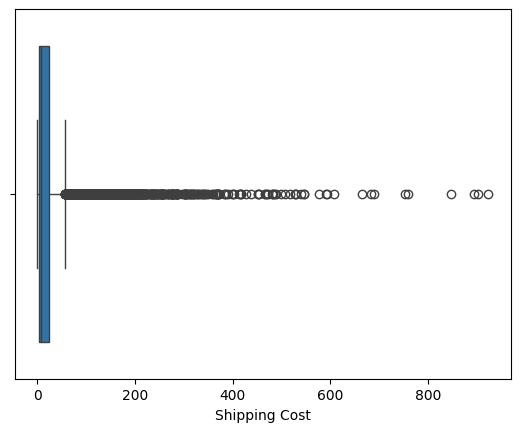

In [111]:
sns.boxplot(x='Shipping Cost',data=df)

(array([9.36e+03, 4.15e+02, 1.25e+02, 5.00e+01, 1.80e+01, 1.80e+01,
        4.00e+00, 3.00e+00, 2.00e+00, 4.00e+00]),
 array([1.00000e-02, 9.23720e+01, 1.84734e+02, 2.77096e+02, 3.69458e+02,
        4.61820e+02, 5.54182e+02, 6.46544e+02, 7.38906e+02, 8.31268e+02,
        9.23630e+02]),
 <BarContainer object of 10 artists>)

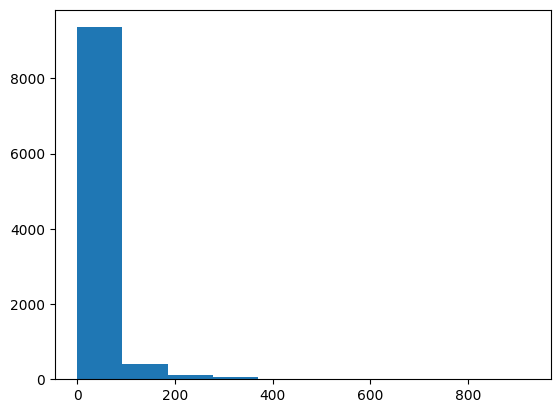

In [112]:
plt.hist(x='Shipping Cost',data=df,bins=10)

<Axes: xlabel='Shipping Cost', ylabel='Sales'>

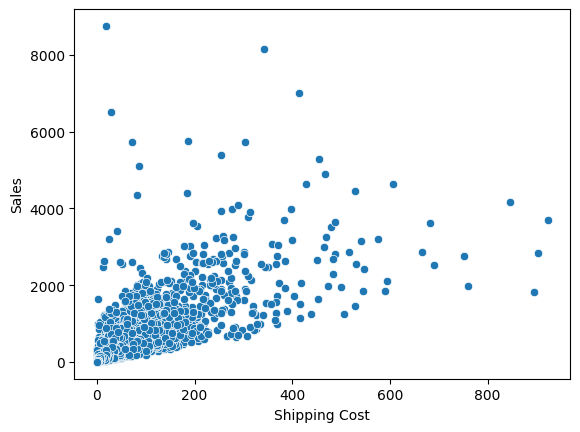

In [113]:
sns.scatterplot(x='Shipping Cost',y='Sales',data=df)

In [114]:
df[df['Shipping Cost']>300 ].head(5)

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
305,Consumer,Furniture,Chairs,8,0.0,673.8816,487.15,High,2807.84
415,Corporate,Furniture,Chairs,6,0.0,358.0200,752.47,Critical,2754.00
700,Corporate,Technology,Machines,10,0.0,258.9000,301.73,High,1619.10
775,Consumer,Furniture,Tables,1,0.0,384.8100,325.04,Critical,855.15
912,Corporate,Office Supplies,Appliances,5,0.1,561.4800,689.80,Critical,2526.93


**As we can observe ,above shipping cost are HIGH usually for critical and also for Corporate segments,which are essential so we are not treating them**

<Axes: xlabel='Sales'>

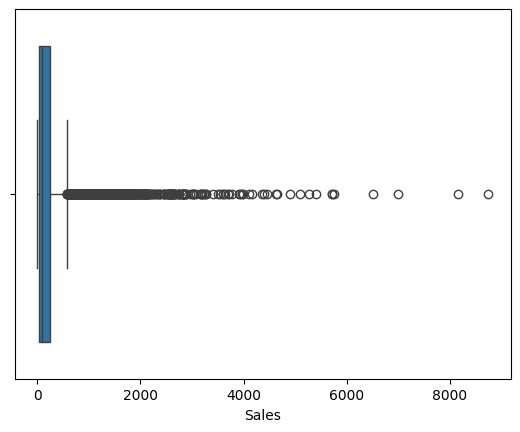

In [115]:
sns.boxplot(x='Sales',data=df)

In [116]:
df[df.Sales>8000]

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
2255,Consumer,Technology,Machines,8,0.4,-54.918,342.11,Medium,8159.952
8209,Consumer,Technology,Machines,5,0.0,2799.984,17.83,Critical,8749.950


**As we can observe above,we have sales more than 8000 as those are machines being sold at that prices, we will not consider 
them outliers**

***Creating another dataset with restricting value under 3 threshold standard deviation***

In [117]:
EXEP=df.copy()
EXEP.head(2)

,Segment,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales
0,Consumer,Office Supplies,Storage,2,0.0,106.140,35.46,Medium,408.300
1,Consumer,Office Supplies,Supplies,3,0.1,36.036,9.72,Medium,120.366


In [118]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(EXEP[['Profit','Shipping Cost','Quantity','Discount','Sales']]))
print(z)

        Profit  Shipping Cost  Quantity  Discount     Sales
0     0.474195       0.163832  0.656384  0.670838  0.340374
1     0.025511       0.292761  0.211694  0.200178  0.270115
2     0.015425       0.320256  0.232996  0.670838  0.385130
3     0.371887       0.379680  0.211694  1.682462  0.430195
4     0.036609       0.381809  0.677687  0.200178  0.284312
...        ...            ...       ...       ...       ...
9995  0.194632       0.442120  0.656384  0.670838  0.486647
9996  0.188616       0.446910  1.101074  0.670838  0.483212
9997  0.187272       0.452054  1.101074  0.670838  0.502421
9998  0.203784       0.460214  1.101074  0.670838  0.501149
9999  3.589021       2.650079  2.456447  0.200178  3.665466

[9999 rows x 5 columns]


In [119]:
threshold = 3
print(np.where(z > 3))

(array([  61,  101,  105,  105,  106,  141,  144,  218,  229,  229,  231,
        235,  279,  305,  305,  305,  306,  306,  310,  310,  397,  397,
        415,  415,  440,  494,  523,  524,  525,  525,  640,  672,  700,
        714,  714,  741,  775,  776,  781,  781,  784,  820,  821,  821,
        821,  874,  875,  879,  911,  912,  912,  912,  913,  913,  914,
        914,  914,  926,  968,  968,  968,  969, 1000, 1068, 1068, 1070,
       1110, 1126, 1126, 1131, 1141, 1166, 1189, 1202, 1202, 1202, 1203,
       1204, 1205, 1206, 1265, 1265, 1271, 1285, 1285, 1286, 1300, 1314,
       1350, 1408, 1444, 1444, 1444, 1468, 1521, 1576, 1578, 1578, 1579,
       1610, 1648, 1663, 1663, 1682, 1682, 1682, 1683, 1683, 1683, 1684,
       1684, 1719, 1723, 1724, 1724, 1724, 1727, 1727, 1759, 1765, 1766,
       1766, 1766, 1803, 1847, 1847, 1847, 1858, 1863, 1898, 1907, 1908,
       1928, 1929, 1929, 1938, 1968, 1969, 1971, 1973, 1978, 2026, 2026,
       2026, 2027, 2027, 2027, 2065, 2084, 2085, 2

In [120]:
EXEP.iloc[9998,:]

Segment              Consumer
Category           Technology
Sub-Category      Accessories
Quantity                    9
Discount                  0.1
Profit                592.812
Shipping Cost          175.62
Order Priority           High
Sales                1976.562
Name: 9999, dtype: object

In [121]:
EXEP_1 = EXEP[(z < 3).all(axis=1)]

In [122]:
EXEP_1.shape

(9483, 9)

### As we observe,we have created two data frames

  ### ***i.One to know impact of more sold products,at higher discounts,and higher sales[df]***
  ###   ***ii.Next one is optimmized with 3 threshold Standard deviation (z-Score)[EXEP_1]***

### 6. Clean the data with formatting issues if any. (converting datatypes, replacing dollars, etc.) 

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment         9999 non-null   object 
 1   Category        9999 non-null   object 
 2   Sub-Category    9999 non-null   object 
 3   Quantity        9999 non-null   int64  
 4   Discount        9999 non-null   float64
 5   Profit          9999 non-null   float64
 6   Shipping Cost   9999 non-null   float64
 7   Order Priority  9999 non-null   object 
 8   Sales           9999 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 781.2+ KB


**As we observe above features above are in required format

### 7. Add your view of EDA to enhance understanding of data. i.e., Grouping data and observing the way data is distributed.Try to add as many layers of EDA as possible

Text(0.5, 0, 'Segments')

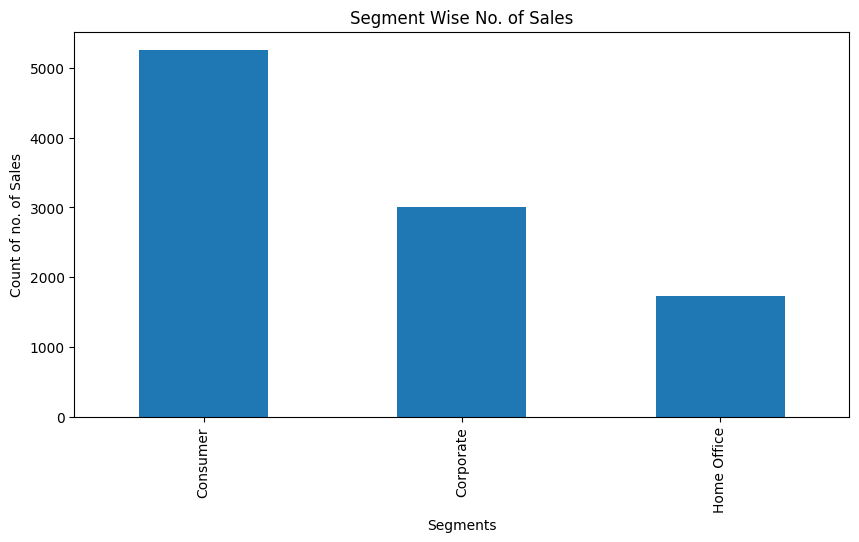

In [124]:
plt.figure(figsize=(10,5))
df['Segment'].value_counts().plot.bar() # sns.countplot("Segment", data = df) #Distribution of customer Segment                                      
plt.title('Segment Wise No. of Sales')
plt.ylabel('Count of no. of Sales')
plt.xlabel('Segments')

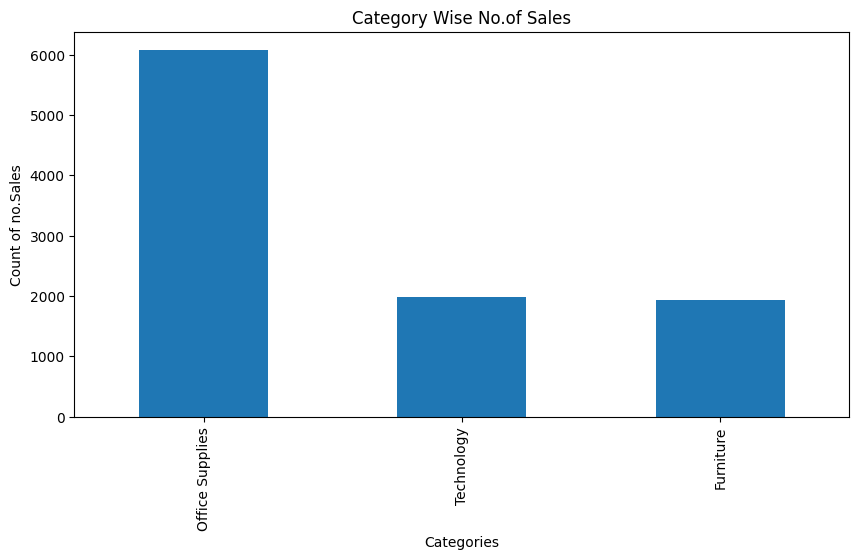

In [125]:
plt.figure(figsize=(10,5))
df['Category'].value_counts().plot.bar()
plt.title('Category Wise No.of Sales')
plt.ylabel('Count of no.Sales')
plt.xlabel('Categories')
plt.show()

*Office Supplies tops of all the Sales in Categories

Text(0.5, 0, 'Sub Categories')

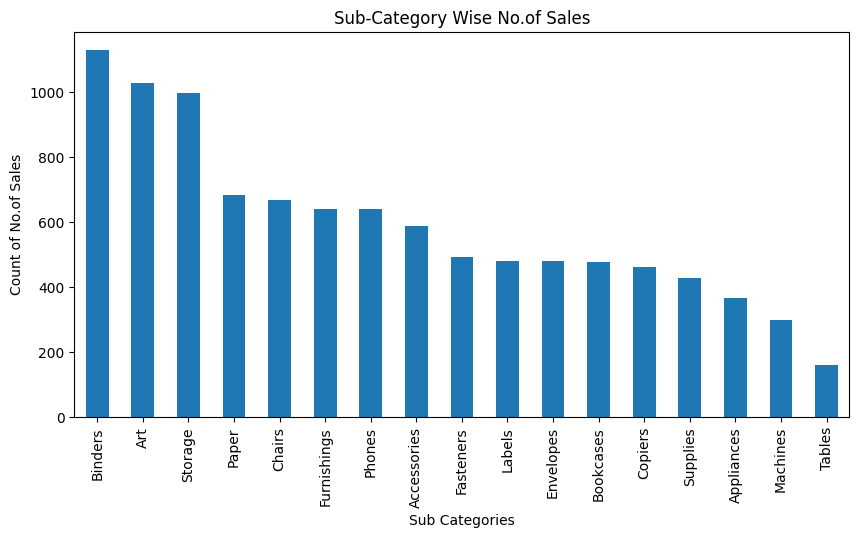

In [126]:
plt.figure(figsize=(10,5))
df['Sub-Category'].value_counts().plot.bar()
plt.title('Sub-Category Wise No.of Sales')
plt.ylabel('Count of No.of Sales')
plt.xlabel('Sub Categories')

-Binders tops in all the Sales in Sub Categories

Text(0.5, 0, 'Order Priorities')

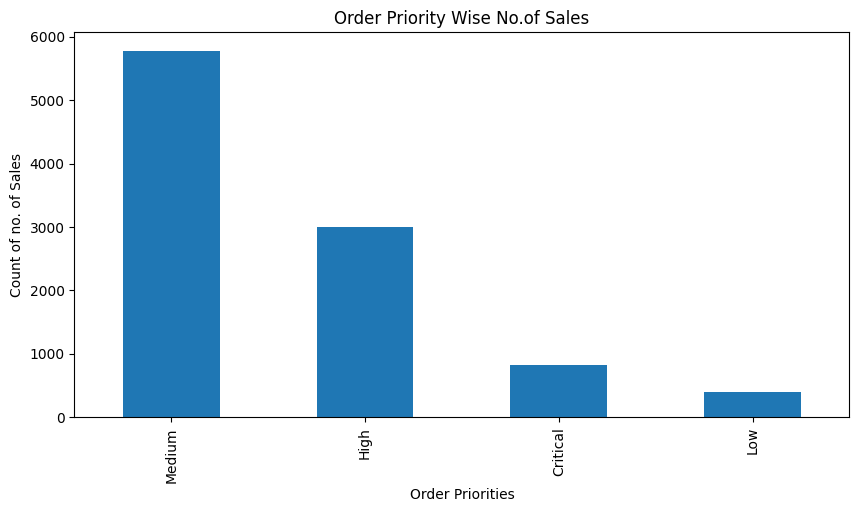

In [127]:
plt.figure(figsize=(10,5))
df['Order Priority'].value_counts().plot.bar()
plt.title('Order Priority Wise No.of Sales')
plt.ylabel('Count of no. of Sales')
plt.xlabel('Order Priorities')

Orders with medium priority sold more

<Axes: xlabel='Order Priority', ylabel='Profit'>

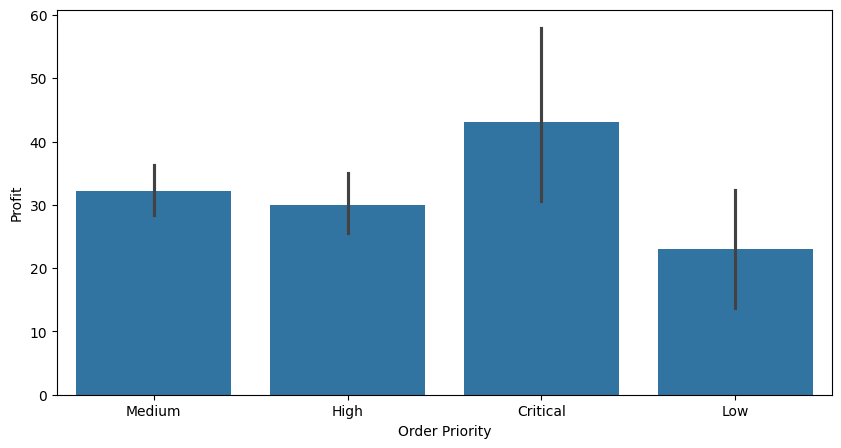

In [129]:
plt.figure(figsize=(10,5))
sns.barplot(x="Order Priority", y= "Profit",data=df)

Critical Order of Priority has High Profit

<Figure size 2000x1000 with 0 Axes>

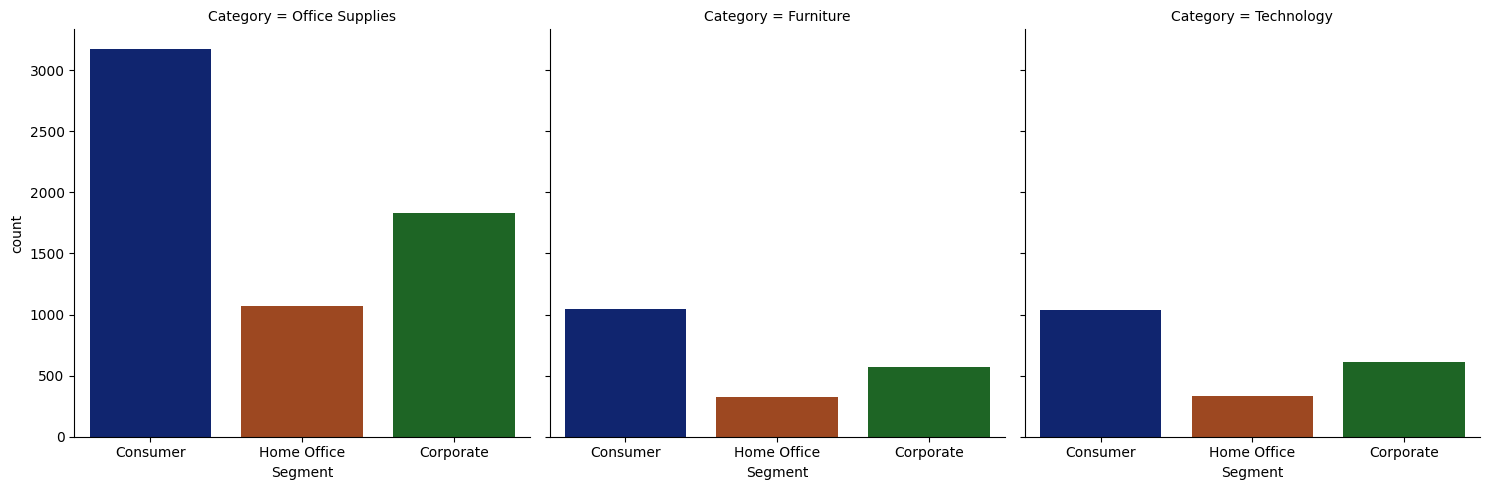

In [132]:
plt.figure(figsize=(20, 10))
sns.catplot(x="Segment", col="Category", data=df, kind="count", palette="dark")


Office Supplies are more sold compared to other category

### 8. Build a model of choice – Regression problem statement, hence build a regression model first and calculate MAE, MSE, RMSE, MPE and MAPE. Also see the R2 score



#### **In this,first we will build model  on 'df'  then 'EXEP' ,which ever model gives more performance will use that model for further models** 

In [133]:
df=pd.get_dummies(df,drop_first=True)
df.head(2)

,Quantity,Discount,Profit,Shipping Cost,Sales,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2,0.0,106.140,35.46,408.300,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
1,3,0.1,36.036,9.72,120.366,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True


In [134]:
X = df.drop('Sales',axis=1)

In [135]:
y = df['Sales']
y

0        408.300
1        120.366
2         66.120
3         44.865
4        113.670
          ...   
9995      18.240
9996      19.860
9997      10.800
9998      11.400
9999    1976.562
Name: Sales, Length: 9999, dtype: float64

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

###  **1. Training the Linear Regression model on the Training set**

In [137]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predicting the Test set results**

In [138]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
y_pred

array([147.46,  70.76, 310.6 , ...,  60.15, 367.86,  52.42])

In [139]:
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
mse

49901.204993136285

In [140]:
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
mae

114.80873336282367

In [141]:
import math
rmse= math.sqrt(mse)
rmse

223.38577616566434

In [142]:
def mean_absolute_percentage_error(y_true, y_predict): 
    y_true, y_predict = np.array(y_true), np.array(y_predict)
    return np.mean(np.abs((y_true - y_predict) / y_true)) * 100

In [143]:
mean_absolute_percentage_error(y_test, y_pred)

186.8684731192819

In [144]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7528501912746187

In [145]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.53 %
Standard Deviation: 7.12 %


### **Now using EXEP (within 3 threshold  values)***

In [146]:
EXEP_1=pd.get_dummies(EXEP_1,drop_first=True)
EXEP_1.head(2)

,Quantity,Discount,Profit,Shipping Cost,Sales,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2,0.0,106.140,35.46,408.300,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
1,3,0.1,36.036,9.72,120.366,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True


In [147]:
p=EXEP_1.drop('Sales',axis=1)
q=EXEP_1['Sales']

In [148]:
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size = 0.3, random_state = 0)

In [149]:
regressor.fit(p_train, q_train)

LinearRegression()

In [150]:
q_pred = regressor.predict(p_test)
q_pred

array([ 471.88,  485.41, 1007.01, ...,   77.45,  141.96,  123.7 ])

In [151]:
mse = sklearn.metrics.mean_squared_error(q_test,q_pred)
mse

14994.267782116875

In [152]:
rmse= math.sqrt(mse)
rmse

122.45108322149247

In [153]:
mean_absolute_percentage_error(q_test, q_pred)

123.43020265540983

In [154]:
mae=sklearn.metrics.mean_absolute_error(q_test,q_pred)
mae

72.51194735487361

In [155]:
r2_score(q_test, q_pred)

0.7759428858745696

**As we Observe above**

**we had two sets of data,one was DF in which we had kept records more than 3 standard deviaton threshold and replaced few outliers with median,keeping in mind the business real time sales values ,and SECONDLY set called EXEP_1 in which we had restricted data to threshold 3, and filterd out outliers using Z-Score**

   - we can observe that EXEP_1 data has been usefull in creation of model,and less errors commpared to df
   - So for further models we will be carrying out with restricted data set within 3 threshold standard deviatiion

In [156]:
df_n=EXEP_1.copy()
df_n.head(2)

,Quantity,Discount,Profit,Shipping Cost,Sales,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2,0.0,106.140,35.46,408.300,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
1,3,0.1,36.036,9.72,120.366,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True


In [157]:
X=df_n.drop('Sales',axis=1)
y=df_n['Sales']

In [158]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [159]:
regressor.fit(X_train, y_train)

LinearRegression()

In [160]:
lg_y_pred = regressor.predict(X_test)
lg_y_pred

array([ 471.88,  485.41, 1007.01, ...,   77.45,  141.96,  123.7 ])

In [161]:
lg_mse = sklearn.metrics.mean_squared_error(y_test,lg_y_pred)  ## Mean Squared Error
lg_mse

14994.267782116875

In [162]:
lg_rmse= math.sqrt(lg_mse)  #Root mean squared error
lg_rmse

122.45108322149247

In [163]:
lg_mape=mean_absolute_percentage_error(y_test, lg_y_pred)
lg_mape

123.43020265540983

In [164]:
lg_mae=sklearn.metrics.mean_absolute_error(y_test,lg_y_pred)  ## Mean absolute error
lg_mae

72.51194735487361

In [165]:
regressor.score(X,y)

0.7692577549641302

In [166]:
lg_r2=r2_score(y_test, lg_y_pred)  ## Regression Co_efficients
lg_r2

0.7759428858745696

Applying K-Fold Cross Validation,with ideal FOLDS of 10

In [167]:
from sklearn.model_selection import cross_val_score
lg_accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lg_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(lg_accuracies.std()*100))

Accuracy: 76.25 %
Standard Deviation: 3.47 %


#### **Hyper Parameter Tuning**

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline that first scales the data and then applies the LinearRegression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', LinearRegression())  # Linear regression model
])

# Define the parameter grid for GridSearchCV
parameters = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False]
}

# Create the GridSearchCV object with the pipeline
lg_grid = GridSearchCV(pipeline, parameters, cv=10)

# Fit the GridSearchCV object
lg_grid.fit(X_train, y_train)

# Print the best score and residual sum of squares
print("R2 score is: ", lg_grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((lg_grid.predict(X_test) - y_test) ** 2))


R2 score is:  0.7625285080556605
Residual sum of squares: 14996.05


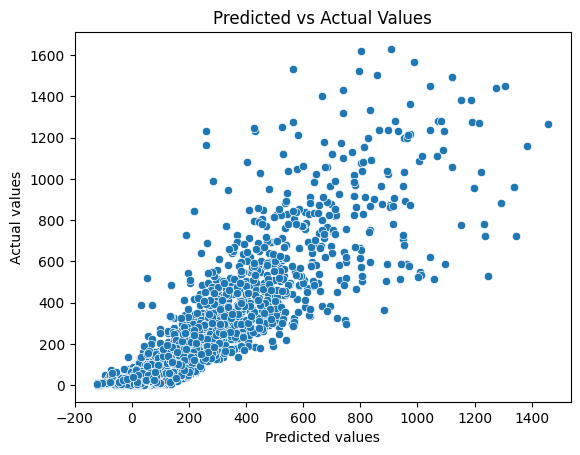

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming lg_y_pred and y_test are Series or arrays
sns.scatterplot(x=lg_y_pred, y=y_test)

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual Values')
plt.show()


## ***ii>> Building Random Forest Regression Model***

In [172]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Evaluation of random forest using Cross validation

In [173]:
from sklearn.model_selection import cross_val_score
rfr_accuracies = cross_val_score(estimator = rfr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(rfr_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(rfr_accuracies.std()*100))

Accuracy: 83.44 %
Standard Deviation: 2.72 %


In [174]:
rfr_y_pred = rfr.predict(X_test)
rfr_y_pred

array([ 562.32,  537.15, 1224.25, ...,   31.57,   99.11,   54.68])

In [175]:
rfr_mse = sklearn.metrics.mean_squared_error(y_test,rfr_y_pred)  ## Mean Squared Error
rfr_mse

10045.123043942012

In [176]:
rfr_rmse= math.sqrt(rfr_mse)  #Root mean squared error
rfr_rmse

100.2253612811748

In [177]:
rfr_mape=mean_absolute_percentage_error(y_test, rfr_y_pred)
rfr_mape

31.843479517818245

In [178]:
rfr_mae=sklearn.metrics.mean_absolute_error(y_test,rfr_y_pred)  ## Mean absolute error
rfr_mae

50.28646321785589

In [179]:
rfr.score(X,y)

0.9376032824341607

In [180]:
rfr_r2=r2_score(y_test, rfr_y_pred)  ## Regression Co_efficients

HYPER PARAMTER TUNING USING RANDOMIZED SEACRH CV

In [182]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid with integer values for max_depth
parameters = [{'n_estimators': [150, 200, 250, 270, 280, 300],
               'max_depth': [4, 5, 6, 7, 8]}]

# Initialize RandomForestRegressor
rfr = RandomForestRegressor()

# Initialize RandomizedSearchCV with corrected parameters
rfr_grid_search = RandomizedSearchCV(estimator=rfr,
                                      param_distributions=parameters,
                                      n_iter=10,
                                      cv=10,
                                      n_jobs=-1,
                                      error_score='raise')  # Set error_score='raise' to catch all errors

# Fit the grid search
rfr_grid_search.fit(X_train, y_train)

# Extract the best score and parameters
rfr_best_score = rfr_grid_search.best_score_
rfr_best_parameters = rfr_grid_search.best_params_

print("Best Score: {:.2f} %".format(rfr_best_score * 100))
print("Best Parameters:", rfr_best_parameters)


Best Score: 83.55 %
Best Parameters: {'n_estimators': 270, 'max_depth': 8}


In [183]:
parameters = [{'n_estimators': [300,350],
               'max_depth':[5,5.01,5.02,5.03]}]
rfr_grid_search = RandomizedSearchCV(estimator = rfr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
rfr_grid_search = rfr_grid_search.fit(X_train, y_train)
rfr_best_score = rfr_grid_search.best_score_
rfr_best_parameters = rfr_grid_search.best_params_
print("Best Score: {:.2f} %".format(rfr_best_score*100))
print("Best Parameters:", rfr_best_parameters)

Best Score: 81.81 %
Best Parameters: {'n_estimators': 350, 'max_depth': 5}


In [185]:
parameters = [{'n_estimators': [295,300,310,320,330],
               'max_depth':[5,5.1,5.2,5.3]}]
rfr_grid_search = RandomizedSearchCV(estimator = rfr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
rfr_grid_search = rfr_grid_search.fit(X_train, y_train)
rfr_best_score = rfr_grid_search.best_score_
rfr_best_parameters = rfr_grid_search.best_params_
print("Best Score: {:.2f} %".format(rfr_best_score*100))
print("Best Parameters:", rfr_best_parameters)

Best Score: 81.82 %
Best Parameters: {'n_estimators': 330, 'max_depth': 5}


In [186]:
rfr_y_pred=rfr_grid_search.predict(X_test)
rfr_y_pred

array([ 517.62,  516.45, 1216.43, ...,   27.59,  107.12,   27.67])

In [187]:
rfr_r2=r2_score(y_test, rfr_y_pred)  ## Regression Co_efficients
rfr_r2

0.8328130585981917

## iii>> Building Decision Tree Model

In [188]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [189]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.55 %
Standard Deviation: 3.13 %


In [190]:
dtr_y_pred = dtr.predict(X_test)
dtr_y_pred

array([ 549.24,  496.44, 1057.38, ...,   15.57,   90.18,   25.68])

In [191]:
dtr_mse = sklearn.metrics.mean_squared_error(y_test,dtr_y_pred)  ## Mean Squared Error
dtr_mse

18282.12691101209

In [192]:
dtr_rmse= math.sqrt(dtr_mse)  #Root mean squared error
dtr_rmse

135.21141560908268

In [193]:
dtr_mape=mean_absolute_percentage_error(y_test, dtr_y_pred)
dtr_mape

40.33595697986736

In [194]:
dtr_mae=sklearn.metrics.mean_absolute_error(y_test,dtr_y_pred)  ## Mean absolute error
dtr_mae

66.16788968717047

In [195]:
dtr.score(X,y)

0.9150902161763184

In [196]:
r2_score(y_test, dtr_y_pred)  ## Regression Co_efficients

0.7268128957492892

**Hyper Tuning of Paramters**

In [197]:
parameters = [{'splitter' : ["best", "random"],
               'max_depth':[3,5],
              'ccp_alpha':[0.1,0.2,0.3,0.4]}]
dtr_grid_search = RandomizedSearchCV(estimator = dtr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
dtr_grid_search = dtr_grid_search.fit(X_train, y_train)
dtr_best_score = dtr_grid_search.best_score_
best_parameters = dtr_grid_search.best_params_
print("Best score: {:.2f} %".format(dtr_best_score*100))
print("Best Parameters:", best_parameters)

Best score: 79.34 %
Best Parameters: {'splitter': 'best', 'max_depth': 5, 'ccp_alpha': 0.4}


In [198]:
parameters = [{'splitter' : ["best"],
               'max_depth':[5,5.1,5.2,5.3,5.4],
              'ccp_alpha':[0.2,0.21,0.22,0.25,0.3]}]
dtr_grid_search = RandomizedSearchCV(estimator = dtr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
dtr_grid_search = dtr_grid_search.fit(X_train, y_train)
dtr_best_accuracy = dtr_grid_search.best_score_
best_parameters = dtr_grid_search.best_params_
print("Best Score: {:.2f} %".format(dtr_best_score*100))
print("Best Parameters:", best_parameters)

Best Score: 79.34 %
Best Parameters: {'splitter': 'best', 'max_depth': 5, 'ccp_alpha': 0.25}


In [199]:
parameters = [{'splitter' : ["best"],
               'max_depth':[5.4,5.45,5,5.5,6,6.5],
              'ccp_alpha':[0.221,0.222,0.223,0.224,0.225]}]
dtr_grid_search = RandomizedSearchCV(estimator = dtr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
dtr_grid_search = dtr_grid_search.fit(X_train, y_train)
dtr_best_score = dtr_grid_search.best_score_
best_parameters = dtr_grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(dtr_best_score*100))
print("Best Parameters:",best_parameters)

Best Accuracy: 79.43 %
Best Parameters: {'splitter': 'best', 'max_depth': 6, 'ccp_alpha': 0.224}


In [200]:
dtr_y_pred=dtr_grid_search.predict(X_test)
dtr_y_pred

array([ 482.79,  482.79, 1075.01, ...,   22.01,  131.26,   22.01])

In [201]:
dtr_r2=r2_score(y_test, dtr_y_pred)  ## Regression Co_efficients
dtr_r2

0.8121115079772321

### iv>> Building Support Vector Regression  Model

In [202]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

### K Fold Cross Validation

In [203]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 53.21 %
Standard Deviation: 3.38 %


In [204]:
svr_y_pred = svr.predict(X_test)
svr_y_pred

array([457.39, 459.37, 377.33, ...,  26.65,  70.07,  32.19])

In [205]:
svr_mse = sklearn.metrics.mean_squared_error(y_test,svr_y_pred)  ## Mean Squared Error
svr_mse

30285.15002599193

In [206]:
svr_rmse= math.sqrt(svr_mse)  #Root mean squared error
svr_rmse

174.02629119185391

In [207]:
svr_mape=mean_absolute_percentage_error(y_test, svr_y_pred)
svr_mape

55.900971493317385

In [208]:
svr_mae=sklearn.metrics.mean_absolute_error(y_test,svr_y_pred)  ## Mean absolute error
svr_mae

79.51223047424297

In [209]:
svr.score(X,y)

0.54672197740705

In [210]:
svr_r2=r2_score(y_test,svr_y_pred)  ## Regression Co_efficients

### Hyper Tuning of Paramters

In [211]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
svr_grid_search = RandomizedSearchCV(estimator = svr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
svr_grid_search = svr_grid_search.fit(X_train, y_train)
svr_best_score = svr_grid_search.best_score_
best_parameters = svr_grid_search.best_params_
print("Best Score: {:.2f} %".format(svr_best_score*100))
print("Best Parameters:", best_parameters)

Best Score: 34.12 %
Best Parameters: {'kernel': 'rbf', 'gamma': 0.4, 'C': 1000}


In [212]:
parameters = [{'C': [10,20,30], 'kernel': ['rbf'], 'gamma': [0.1,0.01,0.001]}]        
svr_grid_search = RandomizedSearchCV(estimator = svr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
svr_grid_search = svr_grid_search.fit(X_train, y_train)
svr_best_score = svr_grid_search.best_score_
best_parameters = svr_grid_search.best_params_
print("Best Score: {:.2f} %".format(svr_best_score*100))
print("Best Parameters:", best_parameters)

Best Score: 72.17 %
Best Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 30}


In [213]:
parameters = [{'C': [30,35,40,45,50,55,60], 'kernel': ['rbf'], 'gamma': [0.001,0.0001,0.00001]}]        
svr_grid_search = RandomizedSearchCV(estimator = svr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
svr_grid_search = svr_grid_search.fit(X_train, y_train)
svr_best_score = svr_grid_search.best_score_
best_parameters = svr_grid_search.best_params_
print("Best Score: {:.2f} %".format(svr_best_score*100))
print("Best Parameters:", best_parameters)

Best Score: 75.25 %
Best Parameters: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 55}


In [214]:
parameters = [{'C': [55,56,57,58,59], 'kernel': ['rbf'], 'gamma': [0.0001,0.00011,0.00012,0.00013,0.00014,0.00015]}]        
svr_grid_search = RandomizedSearchCV(estimator = svr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
svr_grid_search = svr_grid_search.fit(X_train, y_train)
svr_best_score = svr_grid_search.best_score_
best_parameters = svr_grid_search.best_params_
print("Best Score: {:.2f} %".format(svr_best_score*100))
print("Best Parameters:", best_parameters)

Best Score: 75.29 %
Best Parameters: {'kernel': 'rbf', 'gamma': 0.00013, 'C': 59}


In [215]:
svr_y_pred=svr_grid_search.predict(X_test)
svr_y_pred

array([577.85, 554.66, 992.71, ...,  22.05,  69.73,  26.73])

In [216]:
svr_r2=r2_score(y_test, svr_y_pred)  ## Regression Co_efficients
svr_r2

0.7658024798833385

In [217]:
model_acc_comp=pd.DataFrame({'Models':['Linear Regression','Random Forest','Decision Tree',
                                       'Support Vector Machin'],
               'Best R2_Score':[lg_r2,rfr_r2,dtr_r2,svr_r2]})
print(model_acc_comp)

                  Models  Best R2_Score
0      Linear Regression       0.775943
1          Random Forest       0.832813
2          Decision Tree       0.812112
3  Support Vector Machin       0.765802


#### ***We have used 8 independent variable and predicted target on those basis:***

## Conclusion

***Basically  we have used 4 Regression models and there Best R2-Score of the models are as follows:***

1. Linear Regression : **0.775943**
2. Random Forest Regression: **0.833231**
3. Decision Tree Regression :**0.799835**
4. Support Vector Regression models: **0.765350**


***As we observe above Random Forest  Regression has highest R2 Value,so we will be choosing that for our prediction***